# Project: Communicate Data Findings (Electric Load and Weather in Texas State)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">Refrences</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, weather data for different cities in Texas state in the United States (US) is going to be analyzed. Also, a business use case is going to be investigated with electric load, or demand, data for the ERCOT grid (Power System Operator in Texas). The relationship between weather and electrical load in Texas is an important topic to explore due to the immense impact of the weather on energy consumption and the generation of renewable energy. Understanding this relationship can bring invaluable insights into energy resources management and ultimately help improve efficiency, while potentially promoting green energy sources. From its sunny climate to extreme cold and hot temperatures, Texas experiences an array of atmospheric conditions that have a direct impact on electricity demand. It is therefore essential to understand how meteorological phenomena can influence energy demand. The heat of the summer months has the greatest impact on energy consumption in Texas as the additional loads from air conditioning strain electrical grids and force utilities to maintain adequate reserves during peak hours. On the other end of the spectrum, cold temperatures can cause power plants to consume more fuel as output increases to meet thermal load requirements from heating systems. 

The relationship between weather and renewable energy generation is an important one to understand. As the weather changes, so do the availability of resources that are used to generate renewable energy sources such as wind power and solar power. In addition, the weather has a tremendous impact on how efficiently and effectively these renewable energy sources can be used. Wind power is dependent on wind speed, direction, and consistency to effectively create energy from the thrust of turbines. On a sunny day, winds tend to be stronger due to air pressure differences caused by the heating up of surface areas; hence, more wind power can be produced when skies are clear compared with overcast conditions. Solar power relies on sunlight intensity for its energy production; cloudy days greatly reduce solar panels’ effectiveness in creating usable electricity from sunlight photons. Considering patterns of weather across different global regions, therefore, allows for determining which locations in the world are most suitable for constructing renewable infrastructure based on their climate characteristics throughout the entire year. 

In short, the weather has an impact on both consumption of electrical energy and the generation of renewable energy. Therefore, in this part of the project, both datasets, i.e., weather and electric load datasets, will be collected, cleaned, and then explored to find answers to research questions.

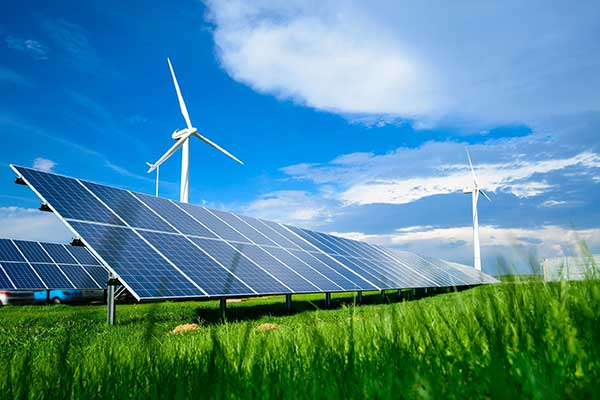

<a id='wrangling'></a>
## Data Wrangling

In this part, the process of data wrangling will take place. Data wrangling involves three steps mainly:
- Data Gathering.
- Data Assessment.
- Data Cleaning.

### Data Gathering

First step in data wrangling is data gathering where the data files are opened in the Notebook using pandas. We will gather two types of data:
- Load Data.
- Weather Data.

In [1]:
#Import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams['savefig.dpi'] = 300
plt.style.use("seaborn-whitegrid")
warnings.filterwarnings('ignore')

#### Gathering Load Data

In [2]:
# Read Load Data

df_load_2013 = pd.read_csv('2013_ercot_hourly_load_data.csv')
df_load_2014 = pd.read_csv('2014_ercot_hourly_load_data.csv')
df_load_2015 = pd.read_csv('2015_ercot_hourly_load_data.csv')
df_load_2016 = pd.read_csv('2016_ercot_hourly_load_data.csv')

df_load_2013.head(5)

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,1/1/2013 1:00,7607.189871,1074.024285,1411.823159,763.069242,10370.322920,2206.945802,4368.528687,883.029500,28684.93347
1,1/1/2013 2:00,7389.267519,1035.189180,1403.601093,754.425986,10153.942810,2160.082197,4233.635250,872.532258,28002.67629
2,1/1/2013 3:00,7179.748411,1036.216739,1395.131213,746.215515,9989.243532,2065.369913,4082.897707,868.951334,27363.77436
3,1/1/2013 4:00,7039.692524,1032.777439,1395.593012,749.028766,9947.855512,1991.151652,4010.524187,865.799032,27032.42212
4,1/1/2013 5:00,6991.412764,1042.906443,1401.239529,757.148203,10097.444230,1954.963942,4038.678495,879.988054,27163.78166


In [3]:
df_load_2016.head(3)

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,1/1/2016 1:00,9001.477932,1148.358788,2107.895986,788.543919,11409.33904,2829.993195,5479.057816,1088.091916,33852.75859
1,1/1/2016 2:00,8864.555456,1134.909662,2100.702470,782.355108,11235.17494,2830.075196,5405.955778,1080.369336,33434.09794
2,1/1/2016 3:00,8745.758728,1126.864026,2099.966167,781.237004,11151.96522,2789.470654,5334.159606,1069.644619,33099.06602


#### Gathering Weather Data

In [4]:
# Read Weather Data

df_Wind_Speed = pd.read_csv('wind_speed.csv')
df_Wind_Direction = pd.read_csv('wind_direction.csv')
df_Weather_Description = pd.read_csv('weather_description.csv')
df_Temperature = pd.read_csv('temperature.csv')
df_Pressure = pd.read_csv('pressure.csv')
df_Humidity = pd.read_csv('humidity.csv')

df_Wind_Speed.head(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,2012-10-01 14:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,2012-10-01 15:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,2012-10-01 16:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0


#### Select Relevant Columns

As we can see, the dataset contains a lot of data frames for different features of a lot of cities. Handling this problem is not easy. Therefore, it would be better to narrow down the focus of our analysis. In this project, the aim is to analyze the effect of weather factors on the electrical load of cities in Texas state in the United States (US). In the weather dataset, only three cities in Texas are available which are 'San Antonio', 'Dallas', and 'Houston'.

This map shows the different regions in Texas that ERCOT is responsible for.
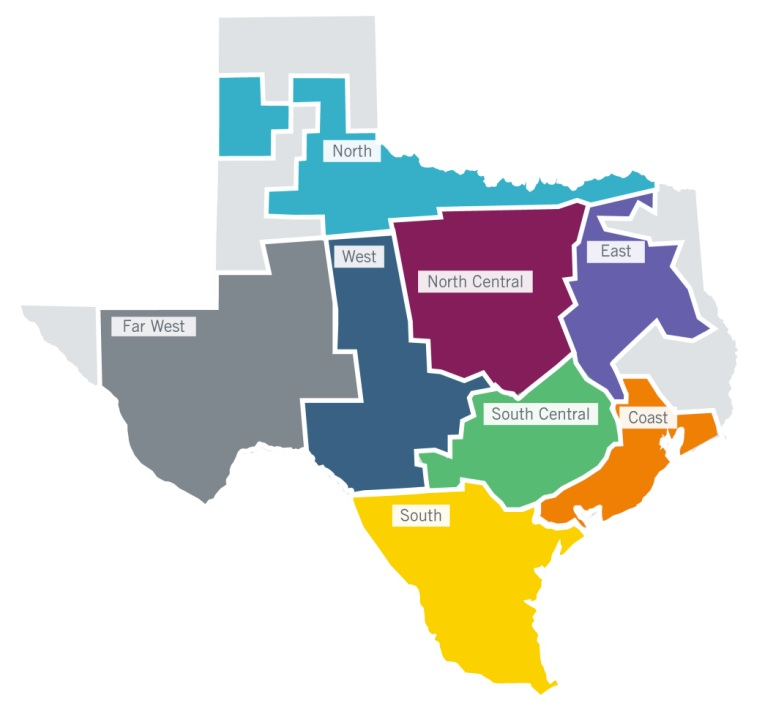

This is the map of Texas state.
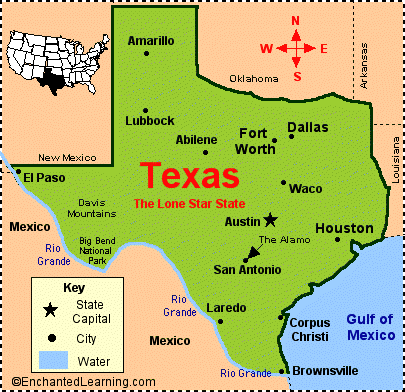

In [5]:
# Select Relevant Columns from Weather Dataset

df_Wind_Speed = df_Wind_Speed[['datetime', 'San Antonio', 'Dallas', 'Houston']]
df_Wind_Direction = df_Wind_Direction[['datetime', 'San Antonio', 'Dallas', 'Houston']]
df_Weather_Description = df_Weather_Description[['datetime', 'San Antonio', 'Dallas', 'Houston']]
df_Temperature = df_Temperature[['datetime', 'San Antonio', 'Dallas', 'Houston']]
df_Pressure = df_Pressure[['datetime', 'San Antonio', 'Dallas', 'Houston']]
df_Humidity = df_Humidity[['datetime', 'San Antonio', 'Dallas', 'Houston']]

### What is the structure of your dataset?

This data contains electric load data and weather data for different regions in texas state in the United States. The data that will be included in our analysis is four years (2013 - 2016) resulting in a total of 35064 rows and several columns as we will see later on after merging and appending the data frames together. 

### What is/are the main feature(s) of interest in your dataset?

We are interested to know more about the weather in Texas. We are interested to know which city is the hottest city among the three cities included. For this purpose, the "Temperature" and "Humidity" columns are used. From "Weather_Description", we are interested to know how the weather is most of the time in a certain city. From "Wind_Speed", we are interested to know which city is best for wind power investments. Also, we are interested to know which weather feature is more correlated with the electric load.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Load data (COAST, ERCOT, ... etc), Weather Description, Wind Speed, and Temperature.

### Data Assessment

#### Assessing Load Data

In [6]:
df_load_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hour_End  8760 non-null   object 
 1   COAST     8760 non-null   float64
 2   EAST      8760 non-null   float64
 3   FAR_WEST  8760 non-null   float64
 4   NORTH     8760 non-null   float64
 5   NORTH_C   8760 non-null   float64
 6   SOUTHERN  8760 non-null   float64
 7   SOUTH_C   8760 non-null   float64
 8   WEST      8760 non-null   float64
 9   ERCOT     8760 non-null   float64
dtypes: float64(9), object(1)
memory usage: 684.5+ KB


In [7]:
df_load_2013.describe()

,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,10760.514556,1381.047890,1642.116797,841.973859,12857.793478,3066.400296,6244.791573,1075.265562,37869.904011
std,2510.925633,322.102778,203.774798,175.694102,3427.738322,750.276923,1647.453842,222.672327,8943.052795
min,6602.878600,787.210803,1248.660263,530.182502,7193.969660,1665.982938,3596.422686,645.778125,23440.518170
25%,9078.432322,1158.187094,1484.238063,719.758655,10555.714110,2517.968148,5127.629422,918.575702,31875.145738
50%,10088.823485,1303.984585,1606.367971,802.097690,11986.752880,2906.029596,5807.064871,1015.467572,35492.280285
75%,12014.475833,1549.058197,1765.128653,931.922704,14637.700345,3582.044120,7164.512287,1201.342804,42472.966842
max,18770.166860,2379.341559,2278.671153,1483.472825,24420.689660,5206.733253,11432.810230,1862.303948,67252.994890


In [8]:
df_load_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hour_End  8760 non-null   object 
 1   COAST     8760 non-null   float64
 2   EAST      8760 non-null   float64
 3   FAR_WEST  8760 non-null   float64
 4   NORTH     8760 non-null   float64
 5   NORTH_C   8760 non-null   float64
 6   SOUTHERN  8760 non-null   float64
 7   SOUTH_C   8760 non-null   float64
 8   WEST      8760 non-null   float64
 9   ERCOT     8760 non-null   float64
dtypes: float64(9), object(1)
memory usage: 684.5+ KB


In [9]:
df_load_2014.describe()

,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11059.662408,1399.031293,1943.542941,841.794950,12917.628591,3175.309600,6368.473798,1123.416693,38828.860274
std,2435.490188,304.075109,204.503063,166.474230,3289.369966,801.139383,1656.434563,226.810885,8742.320901
min,7038.373549,823.585922,1516.607564,522.306095,7373.241387,1805.805207,3664.262275,631.803702,24082.729290
25%,9336.988574,1179.614307,1794.566150,720.415380,10597.787427,2589.971005,5213.900546,962.025501,32693.120957
50%,10460.650230,1332.517848,1903.978119,804.058571,12174.783890,2984.535821,5948.209278,1064.436981,36766.920650
75%,12369.731892,1582.198044,2052.667946,939.353552,14776.441827,3719.697990,7360.315660,1259.684364,43965.852015
max,18578.072210,2324.901643,2688.003731,1407.790797,23445.612440,5352.215917,11452.225730,1852.927598,66464.064270


In [10]:
df_load_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hour_End  8760 non-null   object 
 1   COAST     8760 non-null   float64
 2   EAST      8760 non-null   float64
 3   FAR_WEST  8760 non-null   float64
 4   NORTH     8760 non-null   float64
 5   NORTH_C   8760 non-null   float64
 6   SOUTHERN  8760 non-null   float64
 7   SOUTH_C   8760 non-null   float64
 8   WEST      8760 non-null   float64
 9   ERCOT     8760 non-null   float64
dtypes: float64(9), object(1)
memory usage: 684.5+ KB


In [11]:
df_load_2015.describe()

,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11378.245991,1403.712014,2070.314791,835.197746,13064.566088,3266.404663,6515.656224,1134.444645,39668.542160
std,2517.681866,329.149597,217.361257,177.525511,3523.908943,762.313287,1693.344031,234.720426,9145.749706
min,7261.197391,797.353258,1402.665337,529.538417,7266.444409,1890.401065,3636.703558,729.523038,24337.467370
25%,9626.787991,1165.444399,1924.627631,713.258922,10702.983372,2699.583368,5327.265743,966.400375,33448.235060
50%,10757.169155,1334.085034,2023.521711,789.239645,12158.221660,3107.167220,6138.499849,1076.622683,37592.923580
75%,12665.238365,1590.915130,2175.994492,933.102806,15029.391995,3771.928093,7469.249150,1275.247642,44507.182272
max,19928.724770,2463.955635,2811.840680,1451.536374,24580.645870,5455.452761,12032.553180,1883.889017,69620.407610


In [12]:
df_load_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hour_End  8784 non-null   object 
 1   COAST     8783 non-null   float64
 2   EAST      8783 non-null   float64
 3   FAR_WEST  8783 non-null   float64
 4   NORTH     8783 non-null   float64
 5   NORTH_C   8783 non-null   float64
 6   SOUTHERN  8783 non-null   float64
 7   SOUTH_C   8783 non-null   float64
 8   WEST      8783 non-null   float64
 9   ERCOT     8783 non-null   float64
dtypes: float64(9), object(1)
memory usage: 686.4+ KB


In [13]:
df_load_2016.describe()

,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
count,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000
mean,11694.029194,1398.376129,2142.665562,823.282124,12953.497027,3395.124847,6484.085158,1114.805133,40005.865174
std,2618.443770,336.877532,217.125434,180.485402,3564.421647,834.567055,1719.714030,224.495884,9437.353767
min,7531.596105,786.886674,1757.198271,539.001419,7395.146237,1964.335300,3753.032619,741.591052,25106.822890
25%,9864.625458,1164.010559,1990.008739,698.705770,10586.451310,2771.179928,5323.108989,965.052956,33626.975385
50%,10991.883820,1320.993281,2096.015909,777.059382,12036.062540,3217.636866,6063.689181,1059.033116,37668.496500
75%,13186.394025,1565.436261,2252.682225,911.307298,14631.504525,3933.536975,7333.604533,1227.723193,44705.489975
max,19826.181610,2493.828673,2908.970431,1440.183510,25282.316480,5786.825863,12344.841640,1899.086230,71092.609220


In [14]:
# Make sure all column names are consistant in all data frames.
Column_Names = {
    '2013': df_load_2013.columns.values.tolist(),
    '2014': df_load_2014.columns.values.tolist(),
    '2015': df_load_2015.columns.values.tolist(),
    '2016': df_load_2016.columns.values.tolist()
          }

df_Col_Names = pd.DataFrame(Column_Names)
df_Col_Names['Is_Same?'] = df_Col_Names.nunique(axis=1) == 1
df_Col_Names

,2013,2014,2015,2016,Is_Same?
0,Hour_End,Hour_End,Hour_End,Hour_End,True
1,COAST,COAST,COAST,COAST,True
2,EAST,EAST,EAST,EAST,True
3,FAR_WEST,FAR_WEST,FAR_WEST,FAR_WEST,True
4,NORTH,NORTH,NORTH,NORTH,True
5,NORTH_C,NORTH_C,NORTH_C,NORTH_C,True
6,SOUTHERN,SOUTHERN,SOUTHERN,SOUTHERN,True
7,SOUTH_C,SOUTH_C,SOUTH_C,SOUTH_C,True
8,WEST,WEST,WEST,WEST,True
9,ERCOT,ERCOT,ERCOT,ERCOT,True


All column names are the same for all data frames.

The issues found in the data are: 
- There is one missing value in the 2016 load data (quality issue).
- The data is separated into four data frames (tidiness issue).

#### Assessing Weather Data

In [15]:
# Assessing the percentage of nulls
def Percentage_Nulls(data_frame):
    Percentage = data_frame.isnull().sum()*100/data_frame.shape[0]
    print(Percentage)

In [16]:
df_Wind_Speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     45253 non-null  object 
 1   San Antonio  45252 non-null  float64
 2   Dallas       45251 non-null  float64
 3   Houston      45250 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.4+ MB


In [17]:
df_Wind_Speed.describe()

,San Antonio,Dallas,Houston
count,45252.000000,45251.000000,45250.000000
mean,3.022209,3.631920,2.962586
std,1.867933,2.207958,1.896547
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,5.000000,4.000000
max,15.000000,50.000000,15.000000


In [18]:
df_Wind_Speed.isnull().sum()

datetime       0
San Antonio    1
Dallas         2
Houston        3
dtype: int64

In [19]:
Percentage_Nulls(df_Wind_Speed)

datetime       0.000000
San Antonio    0.002210
Dallas         0.004420
Houston        0.006629
dtype: float64


In [20]:
df_Wind_Direction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     45253 non-null  object 
 1   San Antonio  45252 non-null  float64
 2   Dallas       45252 non-null  float64
 3   Houston      45251 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.4+ MB


In [21]:
df_Wind_Direction.describe()

,San Antonio,Dallas,Houston
count,45252.000000,45252.000000,45251.00000
mean,141.645585,166.072704,154.38008
std,87.543787,91.413755,95.63296
min,0.000000,0.000000,0.00000
25%,82.000000,110.000000,82.00000
50%,140.000000,167.000000,151.00000
75%,178.000000,201.000000,200.00000
max,360.000000,360.000000,360.00000


In [22]:
df_Wind_Direction.isnull().sum()

datetime       0
San Antonio    1
Dallas         1
Houston        2
dtype: int64

In [23]:
Percentage_Nulls(df_Wind_Direction)

datetime       0.00000
San Antonio    0.00221
Dallas         0.00221
Houston        0.00442
dtype: float64


In [24]:
df_Weather_Description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   datetime     45253 non-null  object
 1   San Antonio  45252 non-null  object
 2   Dallas       45252 non-null  object
 3   Houston      45252 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [25]:
df_Weather_Description.describe()

,datetime,San Antonio,Dallas,Houston
count,45253,45252,45252,45252
unique,45253,29,32,33
top,2012-10-01 12:00:00,sky is clear,sky is clear,sky is clear
freq,1,18772,17761,12655


In [26]:
df_Wind_Direction.isnull().sum()

datetime       0
San Antonio    1
Dallas         1
Houston        2
dtype: int64

In [27]:
Percentage_Nulls(df_Weather_Description)

datetime       0.00000
San Antonio    0.00221
Dallas         0.00221
Houston        0.00221
dtype: float64


In [28]:
df_Weather_Description['Houston'].unique()

array([nan, 'sky is clear', 'few clouds', 'scattered clouds',
       'broken clouds', 'overcast clouds', 'light rain', 'moderate rain',
       'haze', 'mist', 'fog', 'thunderstorm with light rain',
       'thunderstorm with heavy rain', 'light intensity drizzle',
       'thunderstorm', 'proximity thunderstorm', 'thunderstorm with rain',
       'shower rain', 'proximity shower rain', 'proximity moderate rain',
       'heavy intensity rain', 'drizzle', 'dust', 'smoke',
       'very heavy rain', 'light snow',
       'proximity thunderstorm with rain', 'squalls',
       'thunderstorm with light drizzle', 'thunderstorm with drizzle',
       'heavy intensity shower rain', 'sand', 'heavy intensity drizzle',
       'volcanic ash'], dtype=object)

In [29]:
def Category_Count(df_Col):
    Splitted_Cat = df_Col.str.get_dummies()
    df_Cat_Count = Splitted_Cat.sum().sort_values(0).loc[::-1].reset_index()
    df_Cat_Count.set_axis(['Weather', 'Frequency'], axis='columns', inplace=True)
    df_Cat_Count['Percentage'] = 100*df_Cat_Count['Frequency']/df_Cat_Count.Frequency.sum()
    return df_Cat_Count

In [30]:
df_Cat_Count_Houston = Category_Count(df_Weather_Description["Houston"])
df_Cat_Count_Dallas = Category_Count(df_Weather_Description["Dallas"])
df_Cat_Count_San_Antonio = Category_Count(df_Weather_Description["San Antonio"])

In [31]:
df_Cat_Count_San_Antonio

,Weather,Frequency,Percentage
0,sky is clear,18772,41.483249
1,overcast clouds,5591,12.355255
2,broken clouds,4129,9.124459
3,light rain,3862,8.534429
4,scattered clouds,3784,8.362061
5,mist,2386,5.272695
6,few clouds,2350,5.193141
7,haze,1199,2.649607
8,moderate rain,1130,2.497127
9,light intensity drizzle,600,1.325908


In [32]:
df_Temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     45253 non-null  object 
 1   San Antonio  45252 non-null  float64
 2   Dallas       45249 non-null  float64
 3   Houston      45250 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.4+ MB


In [33]:
df_Temperature.describe()

,San Antonio,Dallas,Houston
count,45252.000000,45249.000000,45250.000000
mean,293.785646,292.375872,294.204268
std,8.303688,9.464741,7.766719
min,265.050000,261.610333,267.570000
25%,288.600000,285.720000,289.361125
50%,295.184250,293.563000,295.660000
75%,299.490000,299.550000,299.690000
max,313.660000,314.400000,312.910000


In [34]:
Percentage_Nulls(df_Temperature)

datetime       0.000000
San Antonio    0.002210
Dallas         0.008839
Houston        0.006629
dtype: float64


In [35]:
df_Pressure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     45253 non-null  object 
 1   San Antonio  45236 non-null  float64
 2   Dallas       45193 non-null  float64
 3   Houston      45244 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.4+ MB


In [36]:
df_Pressure.describe()

,San Antonio,Dallas,Houston
count,45236.000000,45193.000000,45244.000000
mean,1017.936422,1018.902795,1019.626470
std,11.402700,9.033434,8.048102
min,885.000000,979.000000,982.000000
25%,1013.000000,1013.000000,1014.000000
50%,1017.000000,1017.000000,1018.000000
75%,1024.000000,1025.000000,1025.000000
max,1055.000000,1071.000000,1052.000000


In [37]:
Percentage_Nulls(df_Pressure)

datetime       0.000000
San Antonio    0.037567
Dallas         0.132588
Houston        0.019888
dtype: float64


In [38]:
df_Humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     45253 non-null  object 
 1   San Antonio  44689 non-null  float64
 2   Dallas       44934 non-null  float64
 3   Houston      45132 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.4+ MB


In [39]:
df_Humidity.describe()

,San Antonio,Dallas,Houston
count,44689.000000,44934.000000,45132.000000
mean,67.700799,64.323764,74.065585
std,21.104214,19.587820,18.586459
min,7.000000,9.000000,12.000000
25%,52.000000,50.000000,61.000000
50%,71.000000,65.000000,78.000000
75%,87.000000,79.000000,88.000000
max,100.000000,100.000000,100.000000


In [40]:
Percentage_Nulls(df_Humidity)

datetime       0.000000
San Antonio    1.246326
Dallas         0.704926
Houston        0.267386
dtype: float64


In [41]:
df_Humidity.head(3)

,datetime,San Antonio,Dallas,Houston
0,2012-10-01 12:00:00,NaN,NaN,NaN
1,2012-10-01 13:00:00,93.0,87.0,93.0
2,2012-10-01 14:00:00,92.0,86.0,92.0


In [42]:
df_Humidity.tail(3)

,datetime,San Antonio,Dallas,Houston
45250,2017-11-29 22:00:00,38.0,42.0,50.0
45251,2017-11-29 23:00:00,37.0,45.0,49.0
45252,2017-11-30 00:00:00,48.0,42.0,52.0


In [43]:
# Make sure that all dataframes have the same number of rows

print(df_Wind_Speed.shape)
print(df_Wind_Direction.shape)
print(df_Weather_Description.shape)
print(df_Temperature.shape)
print(df_Pressure.shape)
print(df_Humidity.shape)

(45253, 4)
(45253, 4)
(45253, 4)
(45253, 4)
(45253, 4)
(45253, 4)


All data frames have the same number of rows and columns.

The issues found in the data are:
- All data frames contain some missing values.
- The weather data is from 01-10-2012 to 29-11-2017. Meanwhile, load data is from 01-01-2013 to 31-12-2016. Therefore, load and weather data have to be synchronized by dropping extra rows from the weather data.
- The format in the 'datetime' column and 'Hour_End' column is not consistent. In the 'datetime' column, the format is 'YYYY-MM-DD hh:mm:ss', while the format in the 'Hour_End' column is 'DD/MM/YYYY h:mm'. These formats have to be the same in order to merge the data frames together.

### Data Cleaning

#### First: Combine load data frames into a single data frame.

In [44]:
Load_Data = [df_load_2013, df_load_2014, df_load_2015, df_load_2016]
  
Load_Data = pd.concat(Load_Data)
display(Load_Data)

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,1/1/2013 1:00,7607.189871,1074.024285,1411.823159,763.069242,10370.322920,2206.945802,4368.528687,883.029500,28684.93347
1,1/1/2013 2:00,7389.267519,1035.189180,1403.601093,754.425986,10153.942810,2160.082197,4233.635250,872.532258,28002.67629
2,1/1/2013 3:00,7179.748411,1036.216739,1395.131213,746.215515,9989.243532,2065.369913,4082.897707,868.951334,27363.77436
3,1/1/2013 4:00,7039.692524,1032.777439,1395.593012,749.028766,9947.855512,1991.151652,4010.524187,865.799032,27032.42212
4,1/1/2013 5:00,6991.412764,1042.906443,1401.239529,757.148203,10097.444230,1954.963942,4038.678495,879.988054,27163.78166
...,...,...,...,...,...,...,...,...,...,...
8779,12/31/2016 20:00,10235.077690,1194.606574,2089.906797,730.796890,10948.101490,2972.484950,5712.730175,1014.881335,34898.58590
8780,12/31/2016 21:00,9985.988411,1161.754671,2063.540266,718.952325,10577.314420,2803.337250,5423.515665,994.305521,33728.70853
8781,12/31/2016 22:00,9668.239226,1106.560529,2045.303156,713.668403,10200.589060,2655.172757,5172.592743,975.840716,32537.96659
8782,12/31/2016 23:00,9332.315239,1076.492598,2018.220017,704.164722,9846.657014,2534.890339,4930.975674,950.065468,31393.78107


In [45]:
# Rename the 'Hour_End' column to 'datetime' so that the load data can be merged with the weather data

Load_Data = Load_Data.rename(columns={'Hour_End': 'datetime'})

Load_Data['datetime'] = pd.to_datetime(Load_Data['datetime'])

# Change the format of the 'datetime' to match the format of the 'datetime' column in the weather data

Load_Data['datetime'] = Load_Data['datetime'].dt.strftime('%m/%d/%Y %H')
Load_Data

,datetime,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,01/01/2013 01,7607.189871,1074.024285,1411.823159,763.069242,10370.322920,2206.945802,4368.528687,883.029500,28684.93347
1,01/01/2013 02,7389.267519,1035.189180,1403.601093,754.425986,10153.942810,2160.082197,4233.635250,872.532258,28002.67629
2,01/01/2013 03,7179.748411,1036.216739,1395.131213,746.215515,9989.243532,2065.369913,4082.897707,868.951334,27363.77436
3,01/01/2013 04,7039.692524,1032.777439,1395.593012,749.028766,9947.855512,1991.151652,4010.524187,865.799032,27032.42212
4,01/01/2013 05,6991.412764,1042.906443,1401.239529,757.148203,10097.444230,1954.963942,4038.678495,879.988054,27163.78166
...,...,...,...,...,...,...,...,...,...,...
8779,12/31/2016 20,10235.077690,1194.606574,2089.906797,730.796890,10948.101490,2972.484950,5712.730175,1014.881335,34898.58590
8780,12/31/2016 21,9985.988411,1161.754671,2063.540266,718.952325,10577.314420,2803.337250,5423.515665,994.305521,33728.70853
8781,12/31/2016 22,9668.239226,1106.560529,2045.303156,713.668403,10200.589060,2655.172757,5172.592743,975.840716,32537.96659
8782,12/31/2016 23,9332.315239,1076.492598,2018.220017,704.164722,9846.657014,2534.890339,4930.975674,950.065468,31393.78107


#### Second: Combine weather data frames into a single dataframe.

In [46]:
df_Wind_Speed

,datetime,San Antonio,Dallas,Houston
0,2012-10-01 12:00:00,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,3.0,1.0
2,2012-10-01 14:00:00,0.0,3.0,1.0
3,2012-10-01 15:00:00,0.0,3.0,1.0
4,2012-10-01 16:00:00,0.0,3.0,1.0
...,...,...,...,...
45248,2017-11-29 20:00:00,2.0,3.0,2.0
45249,2017-11-29 21:00:00,2.0,3.0,2.0
45250,2017-11-29 22:00:00,2.0,3.0,3.0
45251,2017-11-29 23:00:00,3.0,2.0,2.0


In [47]:
# Create a weather data frame for each of the three cities

def Create_Data_Frame(City_Name):
    df = pd.DataFrame()
    df['datetime'] = df_Wind_Speed['datetime']
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['datetime'] = df['datetime'].dt.strftime('%m/%d/%Y %H')
    df['Wind Speed'] = df_Wind_Speed[City_Name]
    df['Wind Direction'] = df_Wind_Direction[City_Name]
    df['Weather Description'] = df_Weather_Description[City_Name]
    df['Temperature'] = df_Temperature[City_Name]
    df['Pressure'] = df_Pressure[City_Name]
    df['Humidity'] = df_Humidity[City_Name]
    df = df.iloc[2197:37261] # Select rows for years 2013 to 2016.
    
    return df

df_San_Antonio = Create_Data_Frame('San Antonio')
df_Houston = Create_Data_Frame('Houston')
df_Dallas = Create_Data_Frame('Dallas')

In [48]:
df_Houston.head(5)

,datetime,Wind Speed,Wind Direction,Weather Description,Temperature,Pressure,Humidity
2197,01/01/2013 01,3.0,90.0,broken clouds,281.96,1026.0,76.0
2198,01/01/2013 02,4.0,80.0,overcast clouds,281.96,1026.0,76.0
2199,01/01/2013 03,3.0,90.0,broken clouds,281.63,1026.0,76.0
2200,01/01/2013 04,2.0,90.0,sky is clear,281.49,1025.0,81.0
2201,01/01/2013 05,4.0,90.0,broken clouds,281.49,1025.0,81.0


#### Third: Merge weather and load data into a single dataframe.

In [49]:
def merge_load_weather(df):
    Load_Data['datetime'] = pd.to_datetime(Load_Data['datetime'])
    Load_Data['datetime'] = Load_Data['datetime'].dt.strftime('%m/%d/%Y %H')
    df_merged = Load_Data.set_index("datetime").join(df.set_index("datetime"), on = "datetime")
    df_merged = df_merged.reset_index()
    df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])
    return df_merged

df_San_Antonio = merge_load_weather(df_San_Antonio)
df_Houston = merge_load_weather(df_Houston)
df_Dallas = merge_load_weather(df_Dallas)

In [50]:
df_Houston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             35064 non-null  datetime64[ns]
 1   COAST                35063 non-null  float64       
 2   EAST                 35063 non-null  float64       
 3   FAR_WEST             35063 non-null  float64       
 4   NORTH                35063 non-null  float64       
 5   NORTH_C              35063 non-null  float64       
 6   SOUTHERN             35063 non-null  float64       
 7   SOUTH_C              35063 non-null  float64       
 8   WEST                 35063 non-null  float64       
 9   ERCOT                35063 non-null  float64       
 10  Wind Speed           35064 non-null  float64       
 11  Wind Direction       35064 non-null  float64       
 12  Weather Description  35064 non-null  object        
 13  Temperature          35062 non-

#### Fourth: Fill in missing values.

We show the number of null values in all data frames before filling in the null values.

In [51]:
df_San_Antonio.isnull().sum()

datetime                 0
COAST                    1
EAST                     1
FAR_WEST                 1
NORTH                    1
NORTH_C                  1
SOUTHERN                 1
SOUTH_C                  1
WEST                     1
ERCOT                    1
Wind Speed               0
Wind Direction           0
Weather Description      0
Temperature              0
Pressure                15
Humidity               448
dtype: int64

In [52]:
df_Houston.isnull().sum()

datetime                0
COAST                   1
EAST                    1
FAR_WEST                1
NORTH                   1
NORTH_C                 1
SOUTHERN                1
SOUTH_C                 1
WEST                    1
ERCOT                   1
Wind Speed              0
Wind Direction          0
Weather Description     0
Temperature             2
Pressure                7
Humidity               96
dtype: int64

In [53]:
df_Dallas.isnull().sum()

datetime                 0
COAST                    1
EAST                     1
FAR_WEST                 1
NORTH                    1
NORTH_C                  1
SOUTHERN                 1
SOUTH_C                  1
WEST                     1
ERCOT                    1
Wind Speed               1
Wind Direction           0
Weather Description      0
Temperature              3
Pressure                59
Humidity               263
dtype: int64

Since the data is time-series data, a good approach to fill in missing values would be to use forward and backward fill methods.

In [54]:
# Create a function to fill missing values using both forward and backward fill methods

def fill_missing_values(df):
    df = df.fillna(method="ffill").fillna(method="bfill")
    return df

In [55]:
df_San_Antonio.head(3)

,datetime,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT,Wind Speed,Wind Direction,Weather Description,Temperature,Pressure,Humidity
0,2013-01-01 01:00:00,7607.189871,1074.024285,1411.823159,763.069242,10370.322920,2206.945802,4368.528687,883.029500,28684.93347,0.0,0.0,overcast clouds,284.74,1023.0,NaN
1,2013-01-01 02:00:00,7389.267519,1035.189180,1403.601093,754.425986,10153.942810,2160.082197,4233.635250,872.532258,28002.67629,0.0,0.0,overcast clouds,284.74,1023.0,57.0
2,2013-01-01 03:00:00,7179.748411,1036.216739,1395.131213,746.215515,9989.243532,2065.369913,4082.897707,868.951334,27363.77436,2.0,130.0,light intensity drizzle,284.61,1022.0,66.0


In [56]:
# Fill missing values
df_San_Antonio = fill_missing_values(df_San_Antonio)
df_Houston = fill_missing_values(df_Houston)
df_Dallas = fill_missing_values(df_Dallas)

In [57]:
df_San_Antonio.head(3)

,datetime,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT,Wind Speed,Wind Direction,Weather Description,Temperature,Pressure,Humidity
0,2013-01-01 01:00:00,7607.189871,1074.024285,1411.823159,763.069242,10370.322920,2206.945802,4368.528687,883.029500,28684.93347,0.0,0.0,overcast clouds,284.74,1023.0,57.0
1,2013-01-01 02:00:00,7389.267519,1035.189180,1403.601093,754.425986,10153.942810,2160.082197,4233.635250,872.532258,28002.67629,0.0,0.0,overcast clouds,284.74,1023.0,57.0
2,2013-01-01 03:00:00,7179.748411,1036.216739,1395.131213,746.215515,9989.243532,2065.369913,4082.897707,868.951334,27363.77436,2.0,130.0,light intensity drizzle,284.61,1022.0,66.0


Now, we show the number of null values in all data frames after filling in the null values.

In [58]:
df_San_Antonio.isnull().sum()

datetime               0
COAST                  0
EAST                   0
FAR_WEST               0
NORTH                  0
NORTH_C                0
SOUTHERN               0
SOUTH_C                0
WEST                   0
ERCOT                  0
Wind Speed             0
Wind Direction         0
Weather Description    0
Temperature            0
Pressure               0
Humidity               0
dtype: int64

In [59]:
df_Houston.isnull().sum()

datetime               0
COAST                  0
EAST                   0
FAR_WEST               0
NORTH                  0
NORTH_C                0
SOUTHERN               0
SOUTH_C                0
WEST                   0
ERCOT                  0
Wind Speed             0
Wind Direction         0
Weather Description    0
Temperature            0
Pressure               0
Humidity               0
dtype: int64

In [60]:
df_Dallas.isnull().sum()

datetime               0
COAST                  0
EAST                   0
FAR_WEST               0
NORTH                  0
NORTH_C                0
SOUTHERN               0
SOUTH_C                0
WEST                   0
ERCOT                  0
Wind Speed             0
Wind Direction         0
Weather Description    0
Temperature            0
Pressure               0
Humidity               0
dtype: int64

We can see that all null values have been filled successfully.

#### Fifth: Clean 'Weather Description' column.

There are more than 25 categories in the 'weather description' column. These categories can be reduced by combining similar categories. For example, we can combine 'light snow', 'snow', and 'heavy snow' into one category which is 'Snow'. This way, we can reduce the number of categories, making our analysis much easier. Now, we view the categories in the column for all data frames before cleaning.

In [61]:
Category_Count(df_San_Antonio['Weather Description'])

,Weather,Frequency,Percentage
0,sky is clear,14870,42.408168
1,overcast clouds,4159,11.861168
2,light rain,3334,9.508328
3,broken clouds,3176,9.057723
4,scattered clouds,3002,8.561488
5,few clouds,1579,4.503194
6,mist,1484,4.232261
7,moderate rain,1086,3.097194
8,haze,823,2.347137
9,heavy intensity rain,583,1.662674


In [62]:
Category_Count(df_Houston['Weather Description'])

,Weather,Frequency,Percentage
0,sky is clear,10307,29.394821
1,light rain,4219,12.032284
2,mist,4036,11.510381
3,broken clouds,3931,11.210929
4,scattered clouds,3182,9.074835
5,overcast clouds,2800,7.985398
6,few clouds,2486,7.089893
7,moderate rain,1616,4.608715
8,heavy intensity rain,808,2.304358
9,haze,605,1.725416


In [63]:
Category_Count(df_Dallas['Weather Description'])

,Weather,Frequency,Percentage
0,sky is clear,14397,41.059206
1,broken clouds,3707,10.572097
2,few clouds,3230,9.211727
3,light rain,3187,9.089094
4,overcast clouds,2948,8.407483
5,scattered clouds,2847,8.119439
6,moderate rain,1294,3.690395
7,mist,1243,3.544946
8,heavy intensity rain,743,2.118982
9,haze,639,1.822382


The weather description column is to be cleaned by combining similar weather categories as follows:
<br>Clouds : 
    - broken clouds
    - scattered clouds
    - overcast clouds
    - few clouds
Rain :
    - light rain
    - moderate rain
    - heavy intensity rain
    - shower rain
    - proximity shower rain	
    - heavy intensity shower rain	
    - light intensity drizzle	
    - heavy intensity drizzle	
    - light snow
    - very heavy rain	
    - drizzle
    - proximity moderate rain	
    - freezing rain
Snow :
    - light snow
    - snow
    - heavy snow
Thunderstorm :
    - proximity thunderstorm
    - thunderstorm
Thunderstorm with Rain :
    - thunderstorm with light rain	
    - thunderstorm with rain	 
    - thunderstorm with heavy rain	
    - proximity thunderstorm with rain	 
    - thunderstorm with light drizzle	
    - thunderstorm with drizzle	
    - thunderstorm with heavy drizzle	
    - proximity thunderstorm with drizzle
    - squalls
Mist :
    - mist
    - haze
Dust :
    - sand
    - dust
    - volcanic ash	

In [64]:
def Clean_Weather_Description(W_D):
    W_D = W_D.replace(['broken clouds', 'scattered clouds', 'overcast clouds', 'few clouds'], 'Clouds')
    W_D = W_D.replace(['light rain', 'moderate rain', 'heavy intensity rain', 'shower rain', 'proximity shower rain', 'heavy intensity shower rain',
                                                                               'light intensity drizzle', 'heavy intensity drizzle', 'very heavy rain', 'freezing rain', 'drizzle', 'proximity moderate rain'], 'Rain')
    W_D = W_D.replace(['proximity thunderstorm', 'thunderstorm', 'tornado'], 'Thunderstorm')
    W_D = W_D.replace(['thunderstorm with light rain', 'thunderstorm with rain', 'thunderstorm with heavy rain', 'proximity thunderstorm with rain', 'thunderstorm with light drizzle', 'thunderstorm with drizzle', 'thunderstorm with heavy drizzle', 'squalls', 'proximity thunderstorm with drizzle'], 'Thunderstorm with Rain')
    W_D = W_D.replace(['mist', 'haze'], 'Mist')
    W_D = W_D.replace(['sand', 'dust', 'volcanic ash'], 'Dust')
    W_D = W_D.replace(['light snow', 'snow', 'heavy snow'], 'Snow')
    W_D = W_D.replace(['fog'], 'Fog')
    W_D = W_D.replace(['sky is clear'], 'Clear')
    W_D = W_D.replace(['smoke'], 'Smoke')
    return W_D

We clean the 'Weather Description' column of all dataframes and view the results after cleaning.

In [65]:
df_San_Antonio['Weather Description'] = Clean_Weather_Description(df_San_Antonio['Weather Description'])
df_Houston['Weather Description'] = Clean_Weather_Description(df_Houston['Weather Description'])
df_Dallas['Weather Description'] = Clean_Weather_Description(df_Dallas['Weather Description'])
Category_Count(df_San_Antonio['Weather Description'])

,Weather,Frequency,Percentage
0,Clear,14870,42.408168
1,Clouds,11916,33.983573
2,Rain,5537,15.791125
3,Mist,2307,6.579398
4,Thunderstorm,181,0.516199
5,Fog,178,0.507643
6,Thunderstorm with Rain,67,0.191079
7,Snow,7,0.019963
8,Smoke,1,0.002852


In [66]:
Category_Count(df_Houston['Weather Description'])

,Weather,Frequency,Percentage
0,Clouds,12399,35.361054
1,Clear,10307,29.394821
2,Rain,6885,19.635524
3,Mist,4641,13.235797
4,Fog,367,1.046658
5,Thunderstorm,354,1.009582
6,Thunderstorm with Rain,80,0.228154
7,Smoke,19,0.054187
8,Snow,10,0.028519
9,Dust,2,0.005704


In [67]:
Category_Count(df_Dallas['Weather Description'])

,Weather,Frequency,Percentage
0,Clear,14397,41.059206
1,Clouds,12732,36.310746
2,Rain,5523,15.751198
3,Mist,1882,5.367328
4,Thunderstorm,222,0.633128
5,Fog,138,0.393566
6,Snow,99,0.282341
7,Thunderstorm with Rain,69,0.196783
8,Smoke,1,0.002852
9,Dust,1,0.002852


From the results, we observe that the number of categories in the 'Weather Description' column for all data frames has been reduced from 25+ categories to 9 - 10 categories.

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

### Research Question 1 (Which city is the hottest city of all time?)

A quick and simple way to find the answer to this question is to find the average of temperatures of all cities in addition to the data distribution.

In [68]:
df_Temp_Clean = pd.DataFrame()
df_Temp_Clean['Houston'] = df_Houston['Temperature']
df_Temp_Clean['San Antonio'] = df_San_Antonio['Temperature']
df_Temp_Clean['Dallas'] = df_Dallas['Temperature']

df_Temp_Clean.describe()

,Houston,San Antonio,Dallas
count,35064.000000,35064.000000,35064.000000
mean,293.975910,293.541612,292.217689
std,7.999050,8.478145,9.761763
min,268.750000,265.050000,261.610333
25%,288.747133,288.137989,285.250000
50%,295.530000,295.110000,293.421083
75%,299.642723,299.430000,299.710000
max,312.910000,313.450000,314.400000


In [69]:
# Define a function to plot histogram
def plot_hist(df, variable, x_label, city_name):
    bins = 30
    #plt.figure(figsize=[8, 5])
    plt.hist(data = df, x = variable, bins = bins)
    plt.ylabel('Frequency')
    plt.xlabel(x_label)
    plt.title("Frequency Distribution of " + variable + " in " + city_name,fontsize=15)

    plt.show()

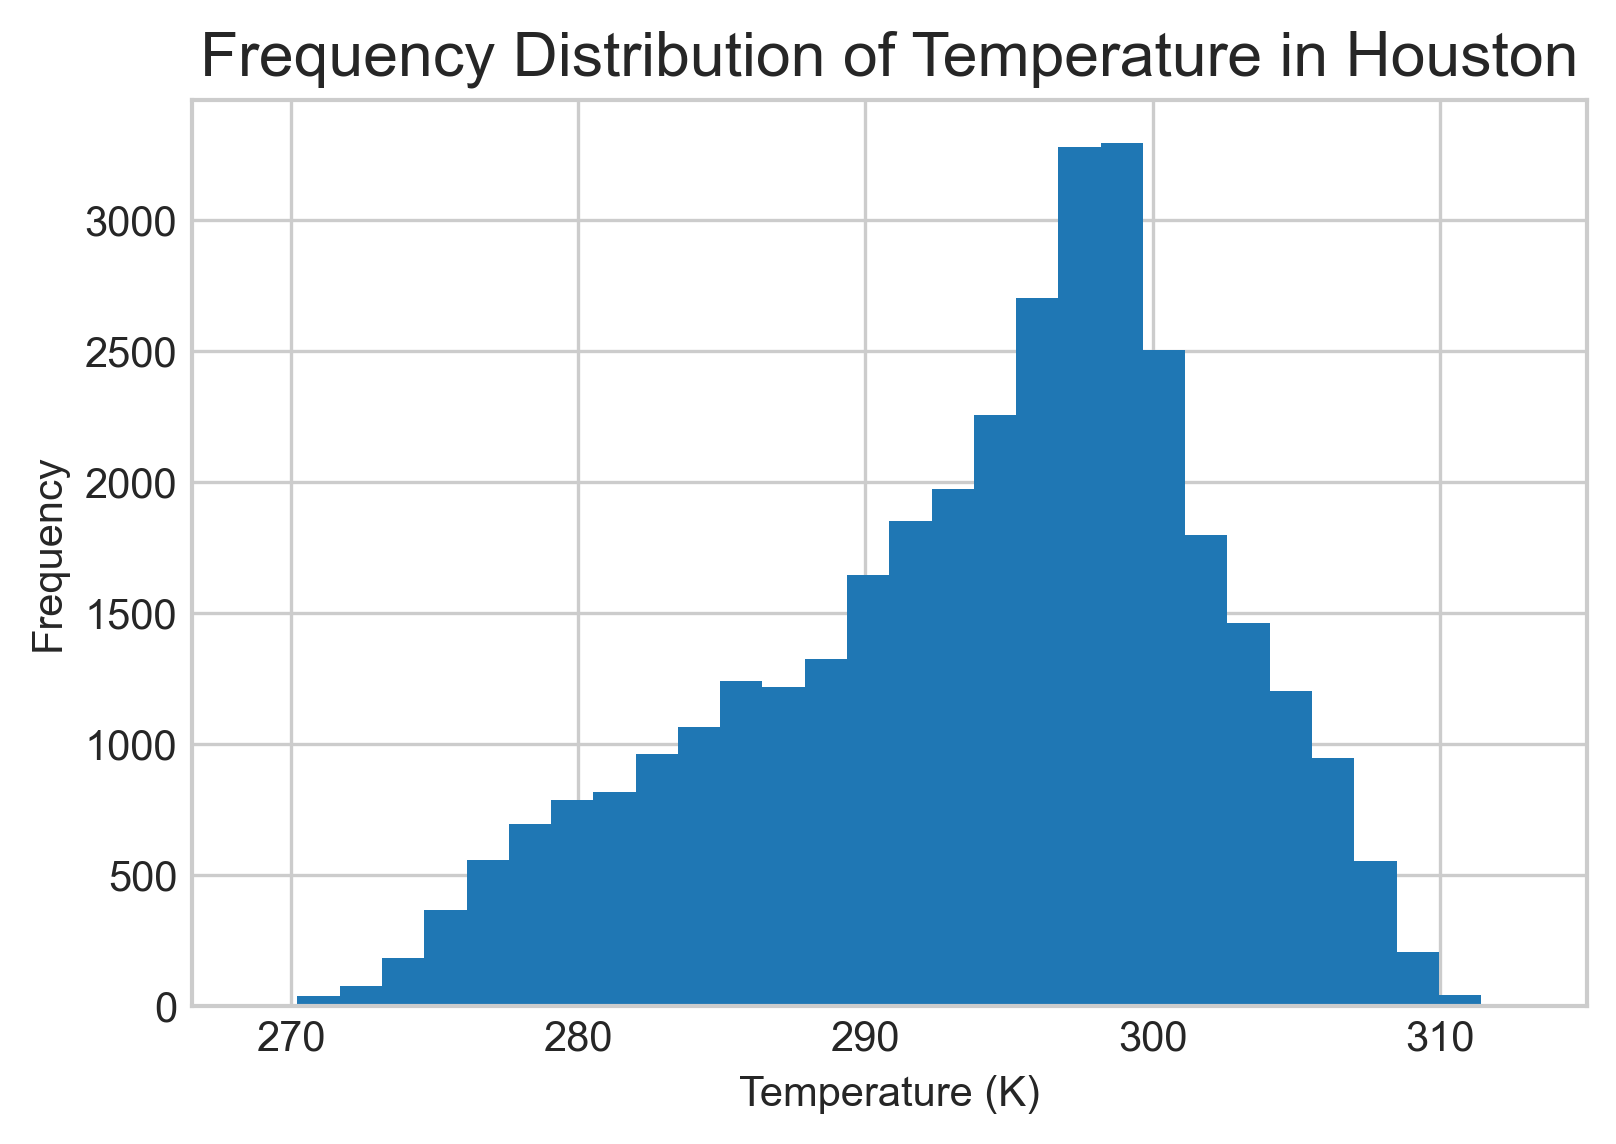

In [70]:
plot_hist(df_Houston, 'Temperature', 'Temperature (K)', 'Houston')

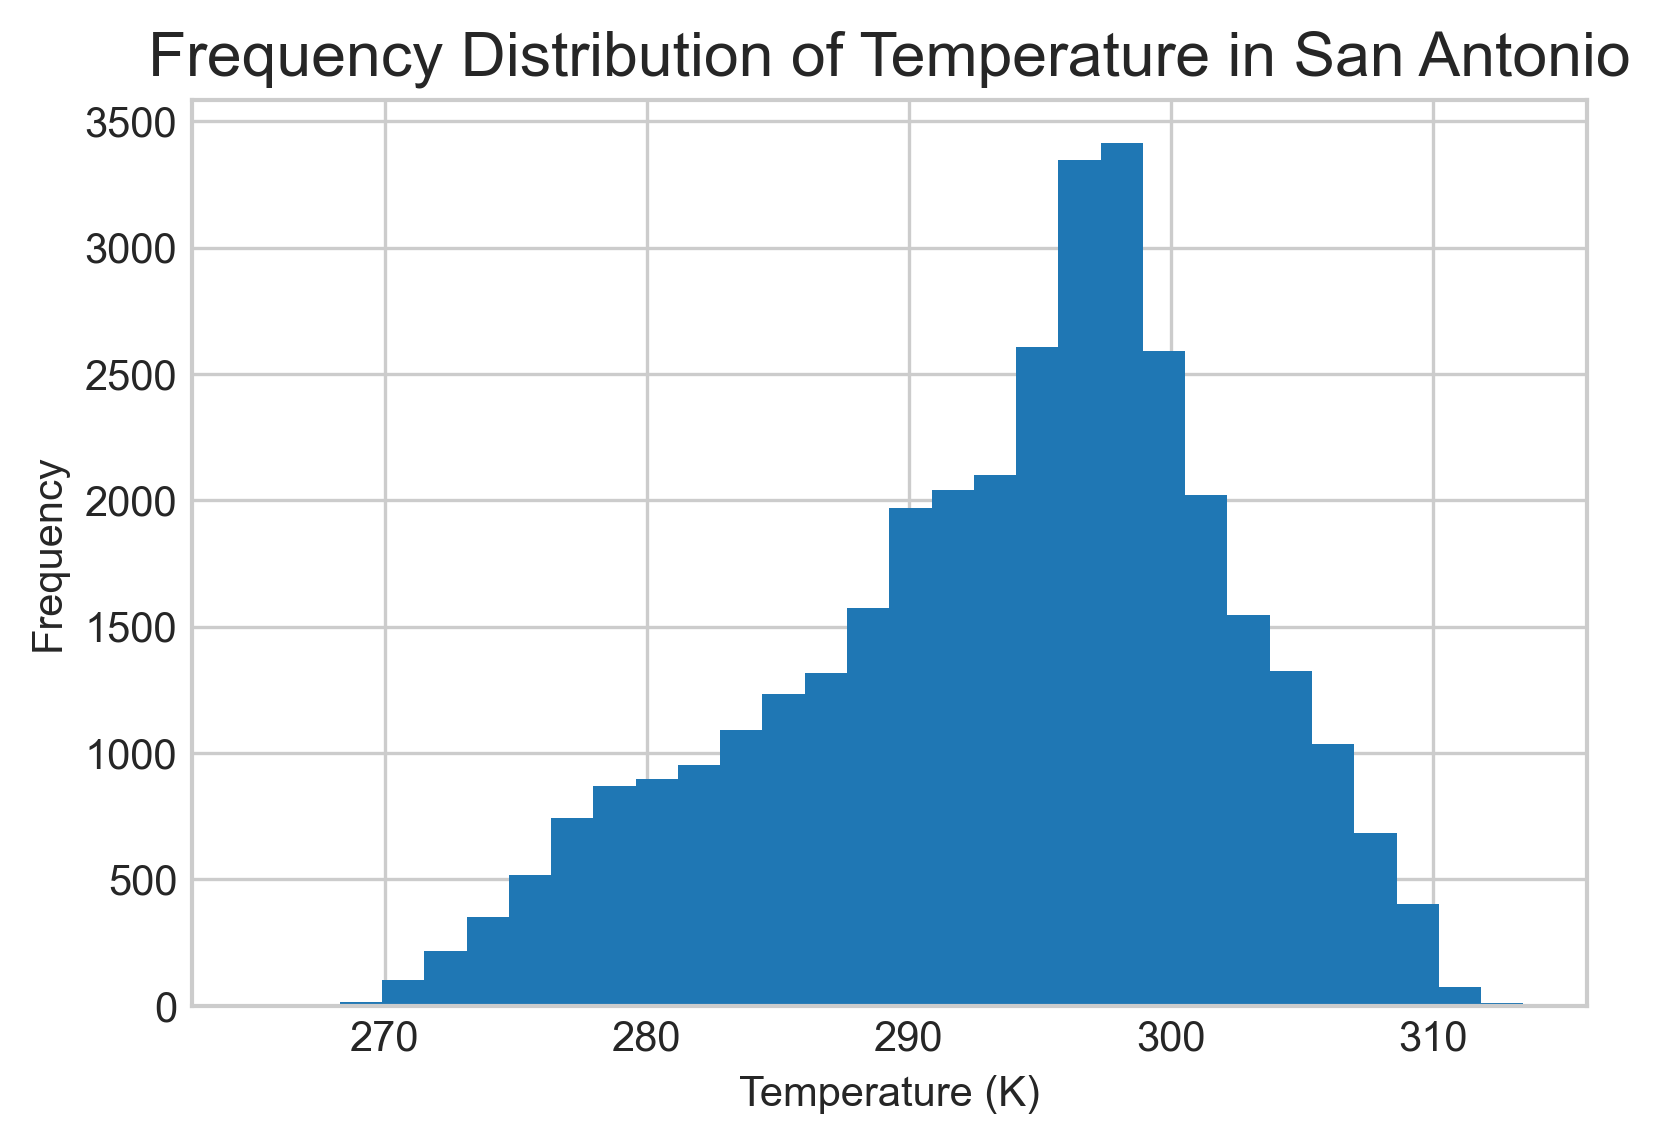

In [71]:
plot_hist(df_San_Antonio, 'Temperature', 'Temperature (K)', 'San Antonio')

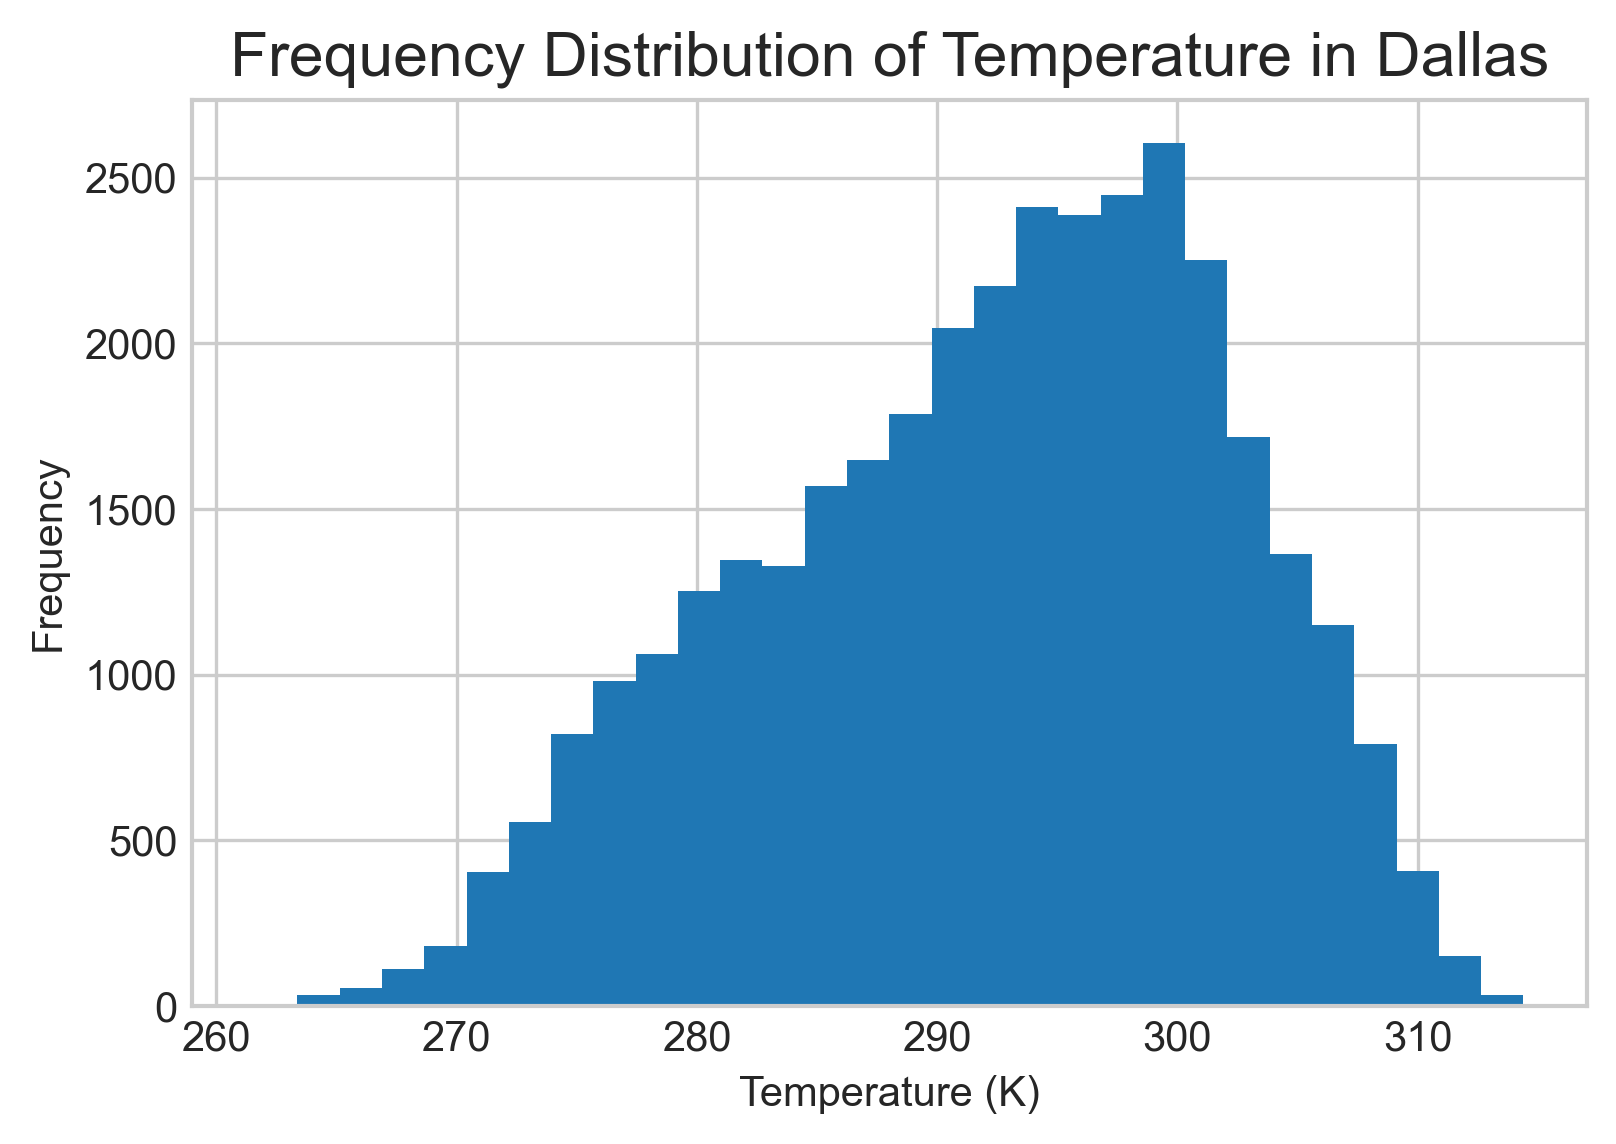

In [72]:
plot_hist(df_Dallas, 'Temperature', 'Temperature (K)', 'Dallas')

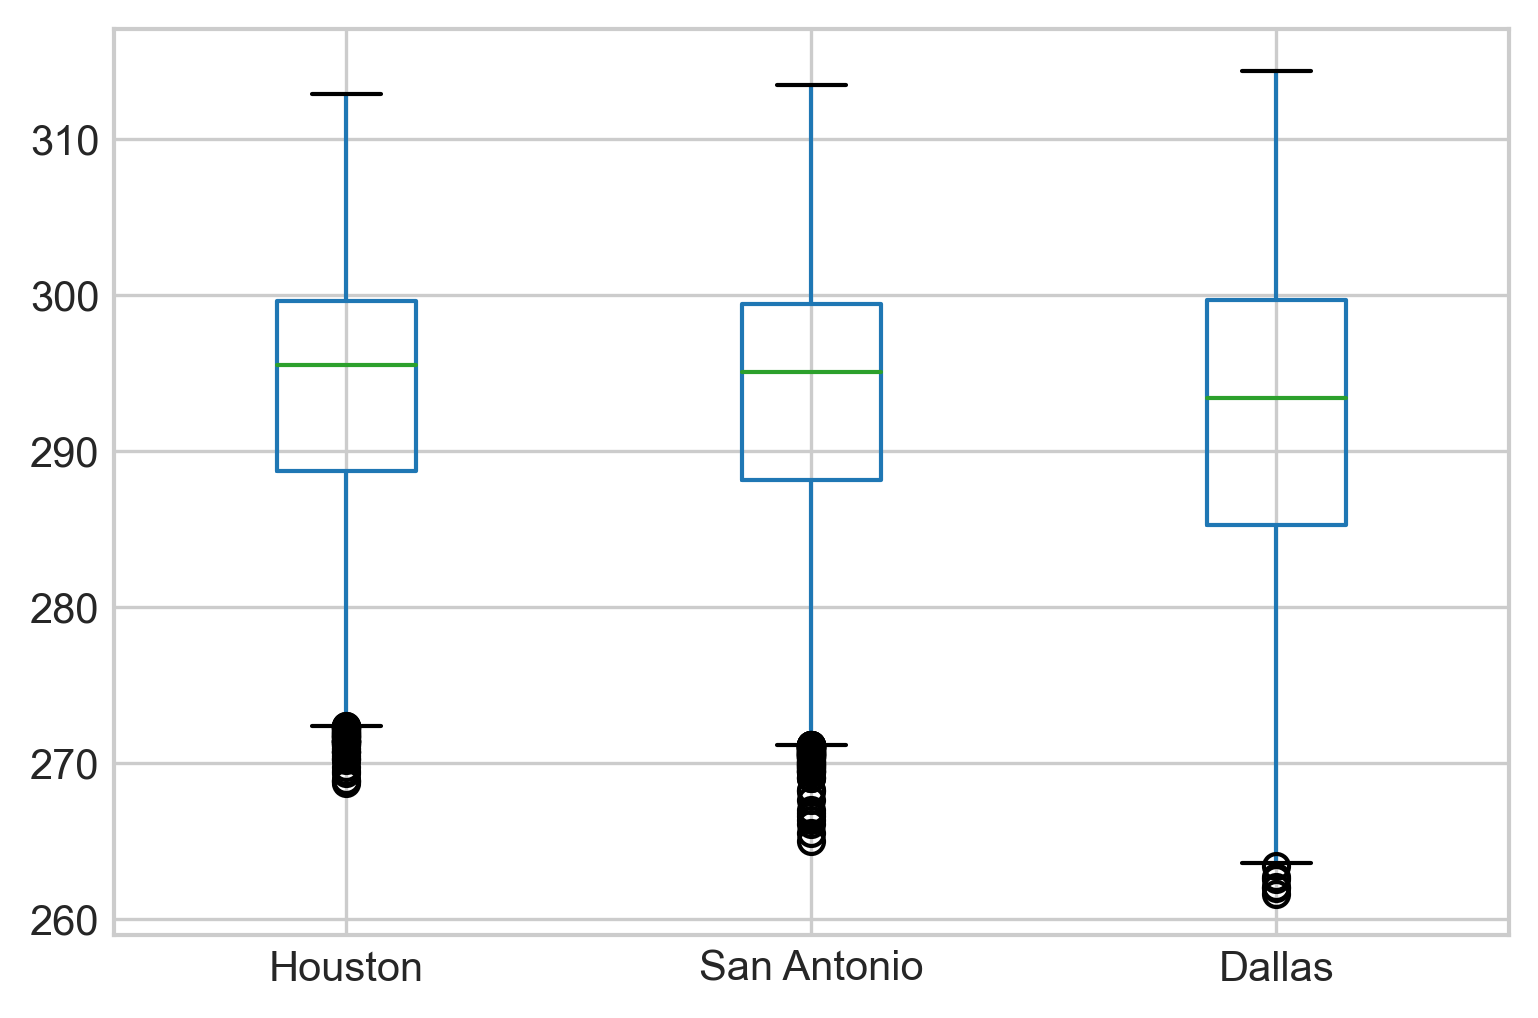

In [73]:
boxplot = df_Temp_Clean.boxplot()

By looking at the mean temperature and distribution of the data, we can see that Houston is the hottest city (in terms of temperature). However, there is another factor that affects how hot the weather is. This factor is the humidity. The higher the humidity is, the hotter the weather is. To take humidity into account, we need to calculate an index called "Heat Index". The heat index, also known as apparent temperature, is a measure of how hot it feels to a human body when relative humidity and air temperature are both taken into consideration.

In [74]:
# Create a function to calculate the heat index

def Heat_Index_Calculator(df):
# In this formula,
# HI = heat index in degrees Fahrenheit
# R = Relative Humidity
# T = Temperature in Fahrenheit
# c1 to c9 = coefficients
    R = df['Humidity']
    T = 1.8*(df['Temperature']-273.15) + 32 # Convert Temperature to Fahrenheit
    c1 = -42.379
    c2= 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -6.83783 * (10**-3)
    c6 = -5.481717 * (10**-2)
    c7 = 1.22874 * (10**-3)
    c8 = 8.5282 * (10**-4)
    c9 = -1.99 * (10**-6)

    HI = c1+c2*T+c3*R+c4*T*R+c5*T*T+c6*R*R+c7*T*T*R+c8*T*R*R+c9*T*T*R*R

    df['Heat Index'] = 273.15 + ((HI - 32) * 5/9) # Convert Temperature to Kelvin
    return df 

# Calculate the heat index for all cities

df_Dallas = Heat_Index_Calculator(df_Dallas)
df_Houston = Heat_Index_Calculator(df_Houston)
df_San_Antonio = Heat_Index_Calculator(df_San_Antonio)

In [75]:
# Create a function to gather the heat index column of all cities into one data frame

def Create_HI_DF(df_Dallas, df_Houston, df_San_Antonio):
    df_HI = pd.DataFrame()
    df_HI['Dallas'] = df_Dallas['Heat Index']
    df_HI['Houston'] = df_Houston['Heat Index']
    df_HI['San Antonio'] = df_San_Antonio['Heat Index']
    return df_HI

df_HI = Create_HI_DF(df_Dallas, df_Houston, df_San_Antonio)

In [76]:
df_HI.describe()

,Dallas,Houston,San Antonio
count,35064.000000,35064.000000,35064.000000
mean,305.448189,301.787354,302.434364
std,13.864926,9.441723,10.429887
min,286.279080,286.279089,286.279139
25%,297.680892,295.953159,296.429128
50%,301.420321,299.773324,299.873827
75%,308.756775,306.002766,305.900325
max,427.889841,372.522536,397.272397


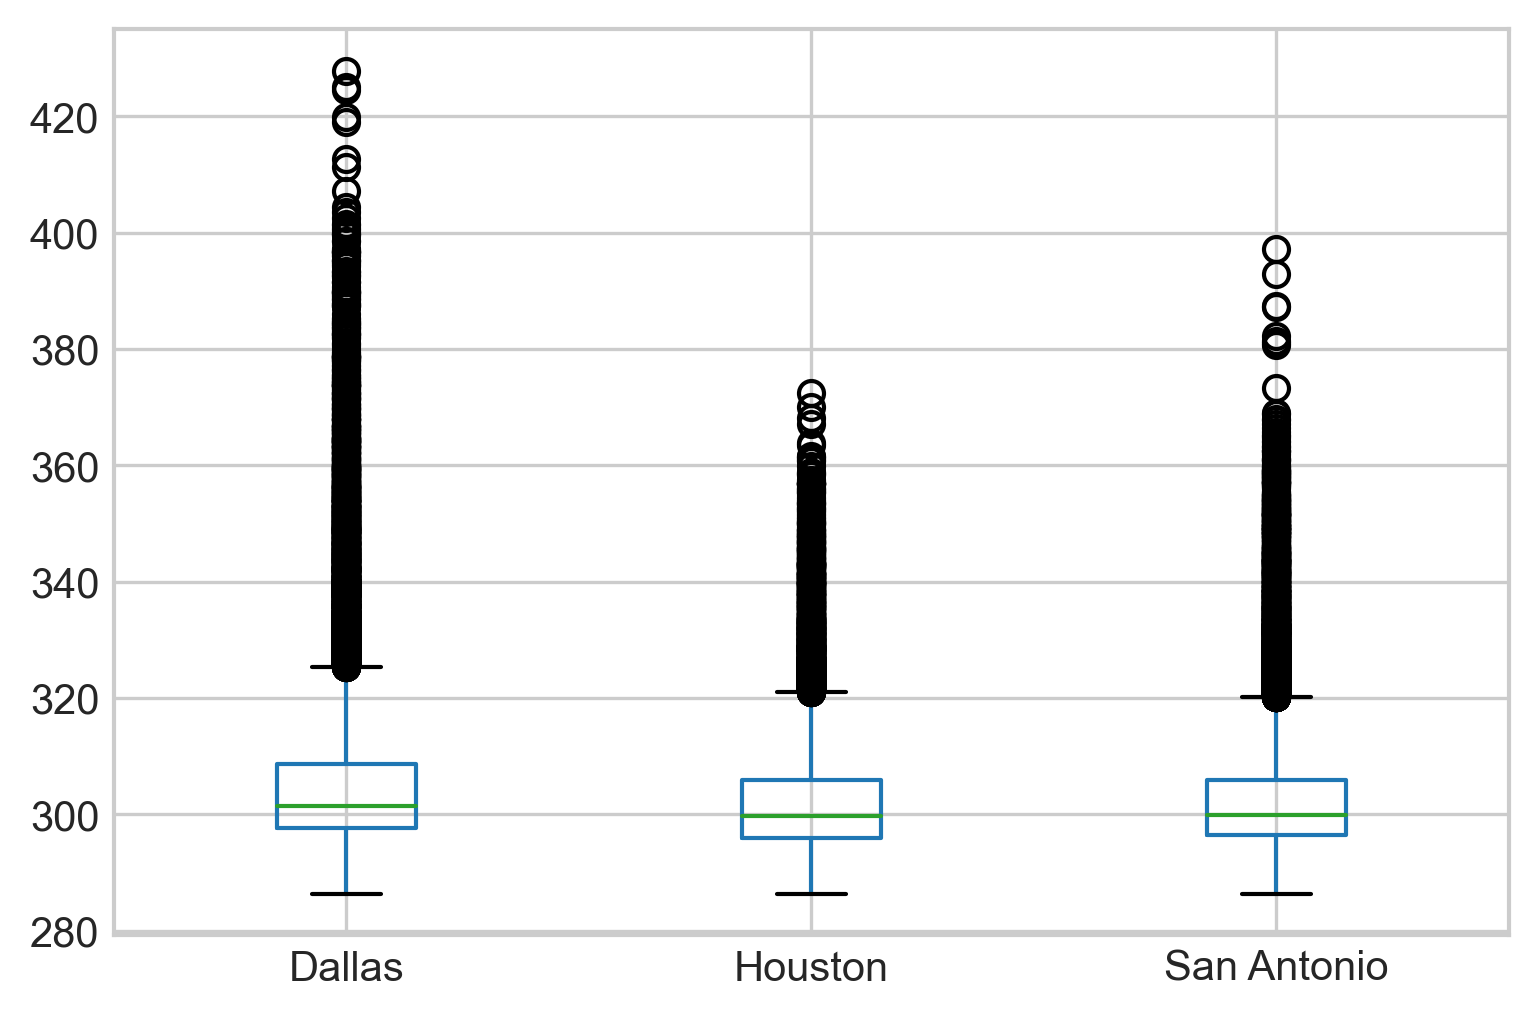

In [77]:
boxplot = df_HI.boxplot()

By looking at the distribution of the data, we can see that 'Dallas' is the hottest city in terms of the heat index. However, there is an issue where the temperature has reached very high and abnormal values (more than 373 K (100 °C)). Therefore, it is important to investigate the reason behind these outliers.

After some research, this formula is valid for a range of values for temperature and relative humidity. We can see from the table below that the highest heat index calculated using this formula is equal to 136 °F, which is approximately 58 °C or 331 K. Also, there is a lower limit for using this formula but this is not our concern here.

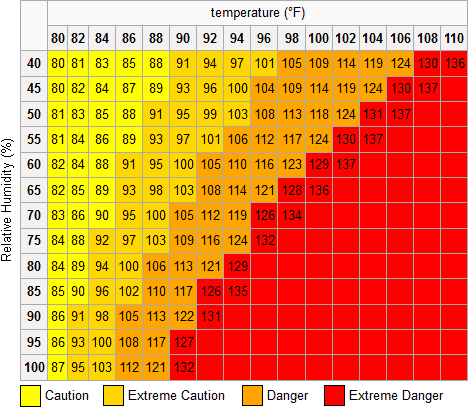

Now, we will see the number of values where the heat index exceeds 331 K.

In [78]:
def find_outliers(df):
    print("Total number of data points is  {}".format(df.shape[0]))
    print("Number of data points exceeding 331 K is {}".format(df[df['Heat Index'] > 331].shape[0]))
    Percentage = 100*df[df['Heat Index'] > 331].shape[0]/df.shape[0]
    print("The percentage of data points exceeding 331 K is {}%".format(round(Percentage, 1)))

In [79]:
find_outliers(df_Dallas)

Total number of data points is  35064
Number of data points exceeding 331 K is 2175
The percentage of data points exceeding 331 K is 6.2%


In [80]:
find_outliers(df_Houston)

Total number of data points is  35064
Number of data points exceeding 331 K is 608
The percentage of data points exceeding 331 K is 1.7%


In [81]:
find_outliers(df_San_Antonio)

Total number of data points is  35064
Number of data points exceeding 331 K is 1018
The percentage of data points exceeding 331 K is 2.9%


We can see that the number of points exceeding 331 K in all cities is relatively low. Therefore, even if we found a more accurate formula for calculating the heat index in that range, Dallas would still be the hottest city because the number of these data points is not high enough to affect our results. The average value is very sensitive to outliers, but the values of the lower quartile, median, and upper quartile are robust to outliers. We have seen in the box plot and descriptive statistics table of the heat index data that Dallas was the highest in terms of everything.

### Research Question 2 (What weather condition is most typical in each of the cities?)

In [82]:
# Plot the findings using bar and pie charts
def plot_bar_and_pie(df,x_axis_label,y_axis_label, city_name):
    sns.barplot(x=x_axis_label, y=y_axis_label,data=df)
    plt.xticks(rotation=60)
    plt.title("Weather Status in " + city_name,fontsize=15)
    plt.xlabel('Weather Status in ' + city_name,fontsize=15)
    plt.ylabel("Frequency",fontsize= 15)
    plt.tight_layout()
    plt.show()
    plt.pie(df[y_axis_label].head(6), labels = df[x_axis_label].head(6), autopct='%2.2f%%')
    plt.tight_layout()
    plt.show()

In [83]:
Cat_Houston = Category_Count(df_Houston['Weather Description'])
Cat_San_Antonio = Category_Count(df_San_Antonio['Weather Description'])
Cat_Dallas = Category_Count(df_Dallas['Weather Description'])

In [84]:
Cat_Houston

,Weather,Frequency,Percentage
0,Clouds,12399,35.361054
1,Clear,10307,29.394821
2,Rain,6885,19.635524
3,Mist,4641,13.235797
4,Fog,367,1.046658
5,Thunderstorm,354,1.009582
6,Thunderstorm with Rain,80,0.228154
7,Smoke,19,0.054187
8,Snow,10,0.028519
9,Dust,2,0.005704


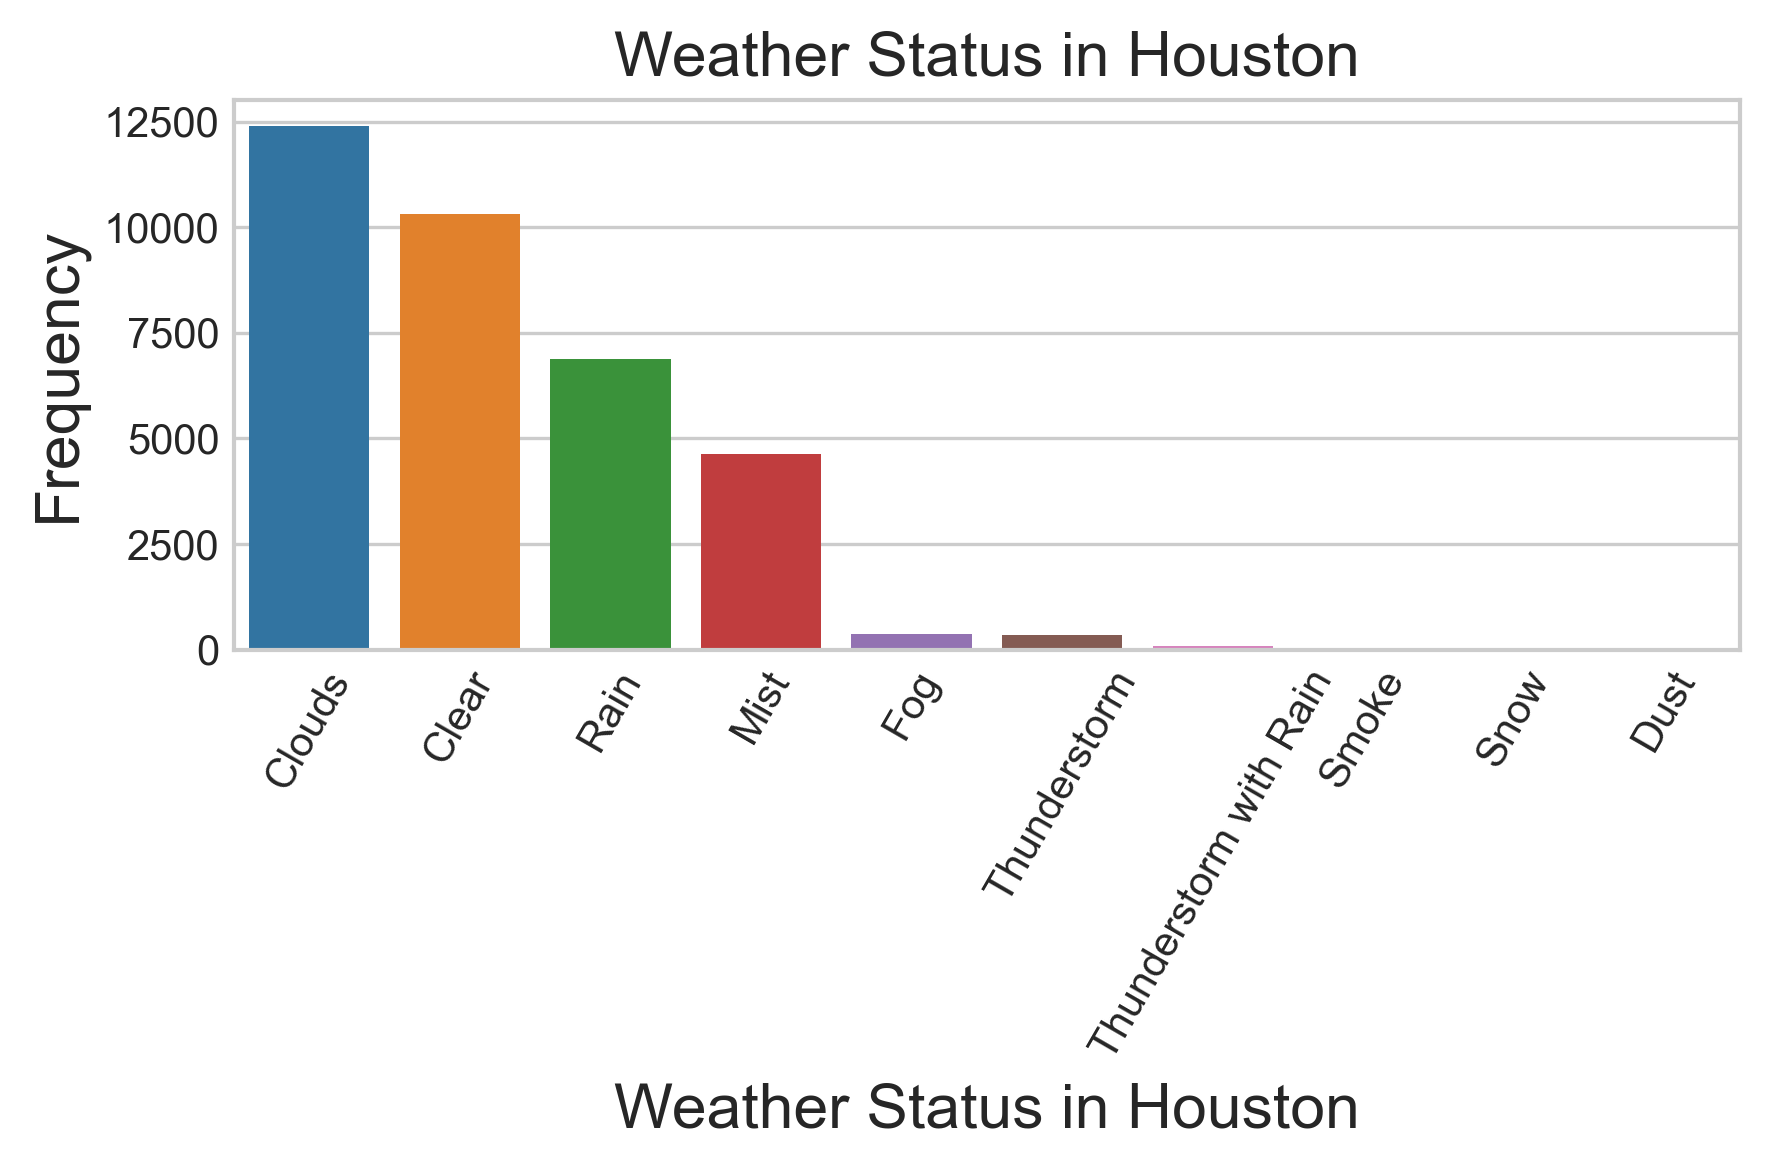

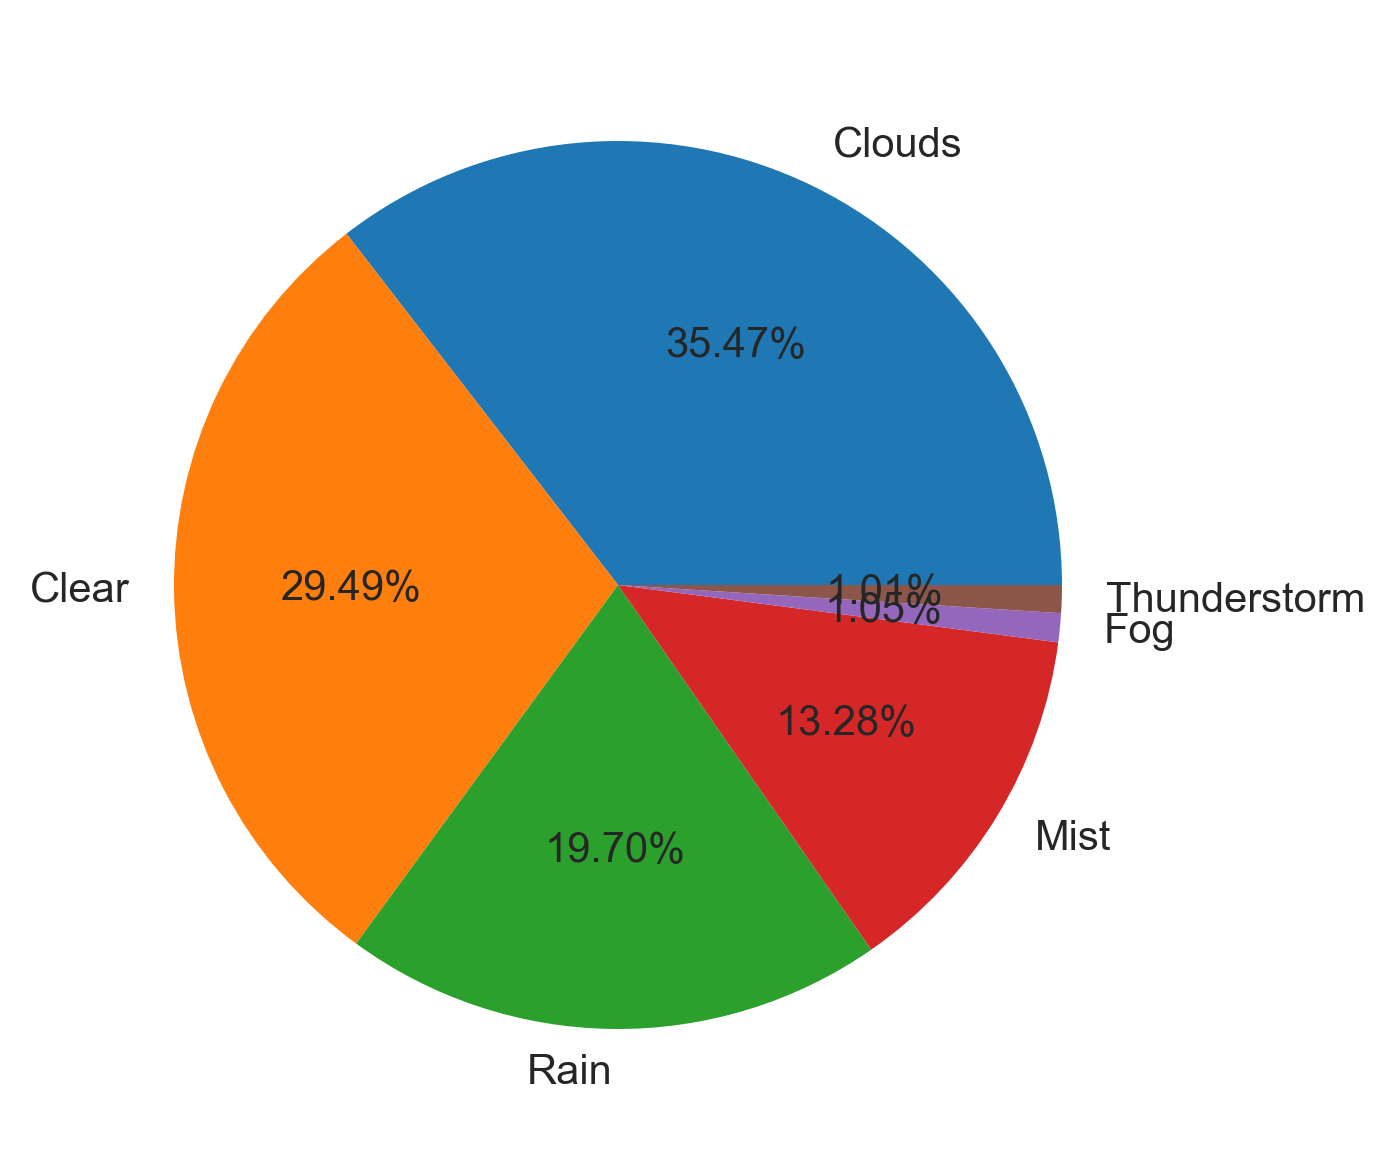

In [85]:
plot_bar_and_pie(Cat_Houston, 'Weather', 'Frequency', 'Houston')

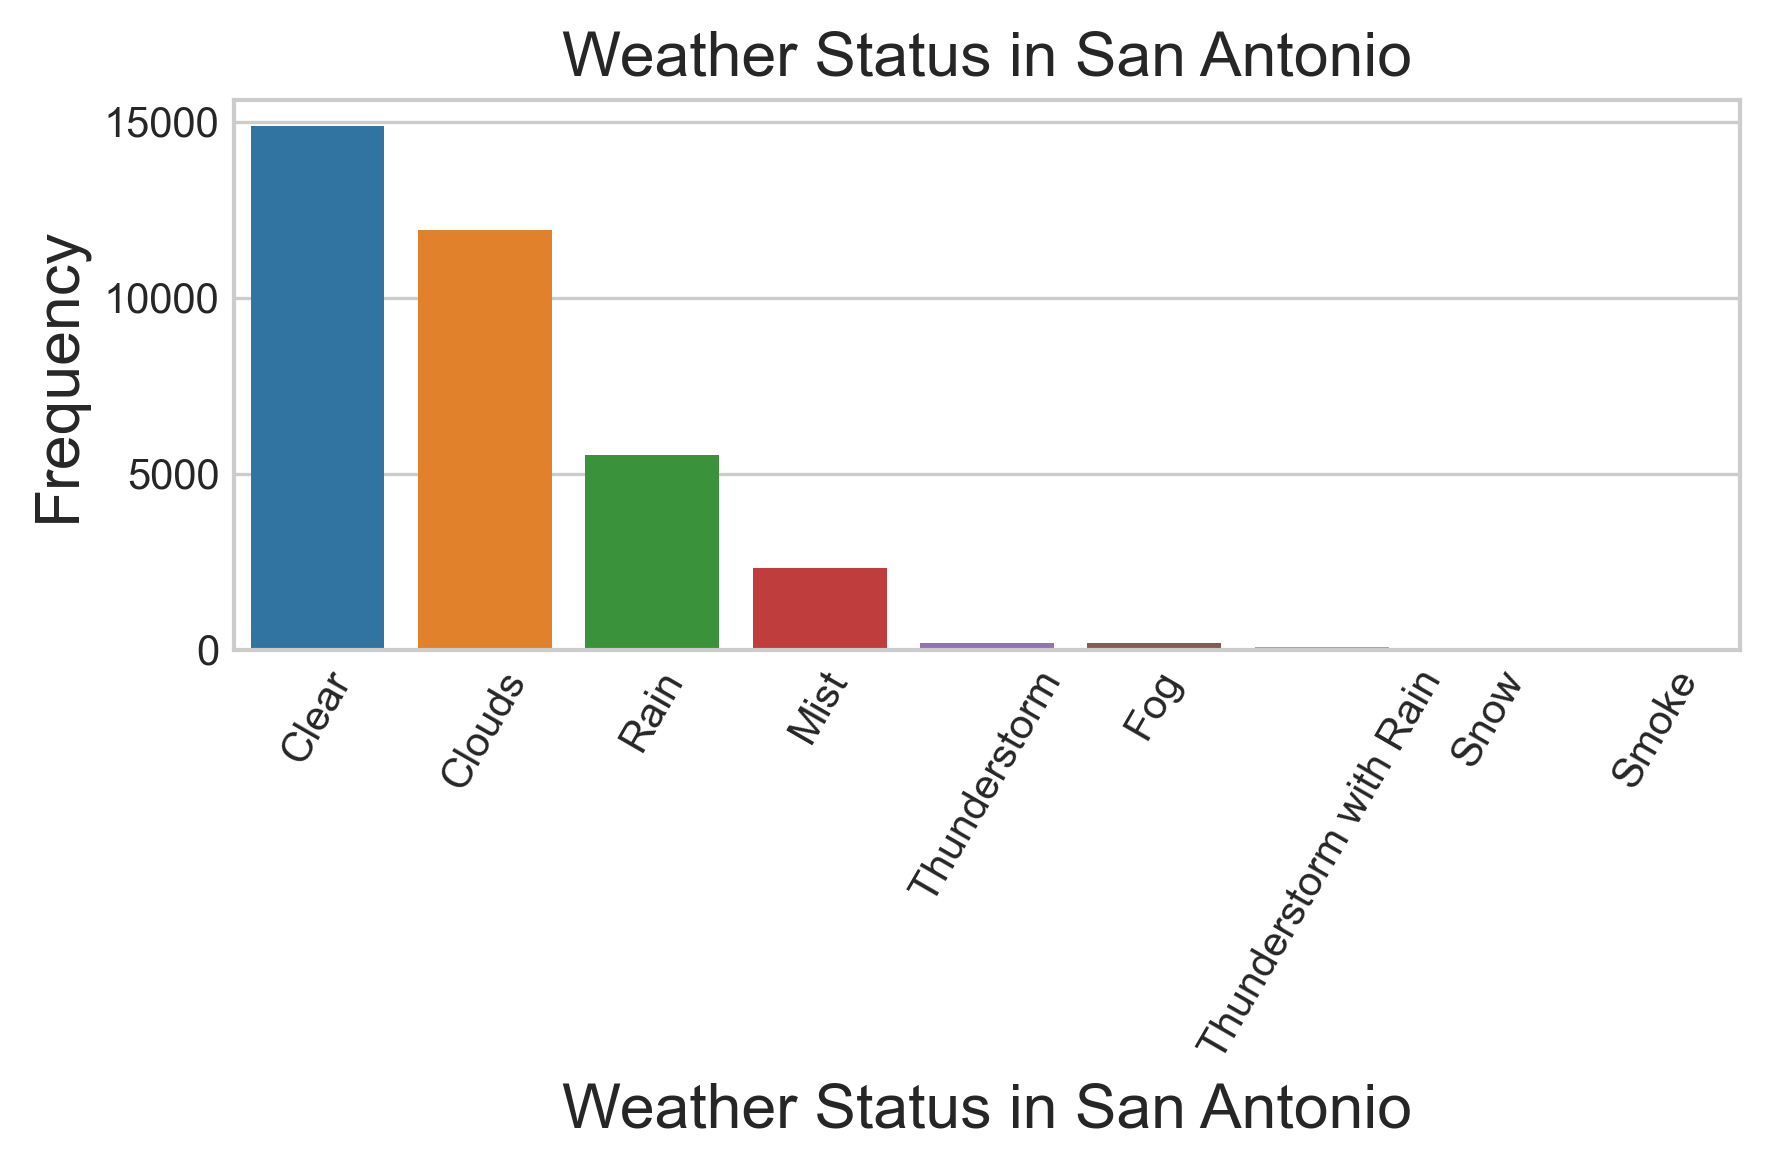

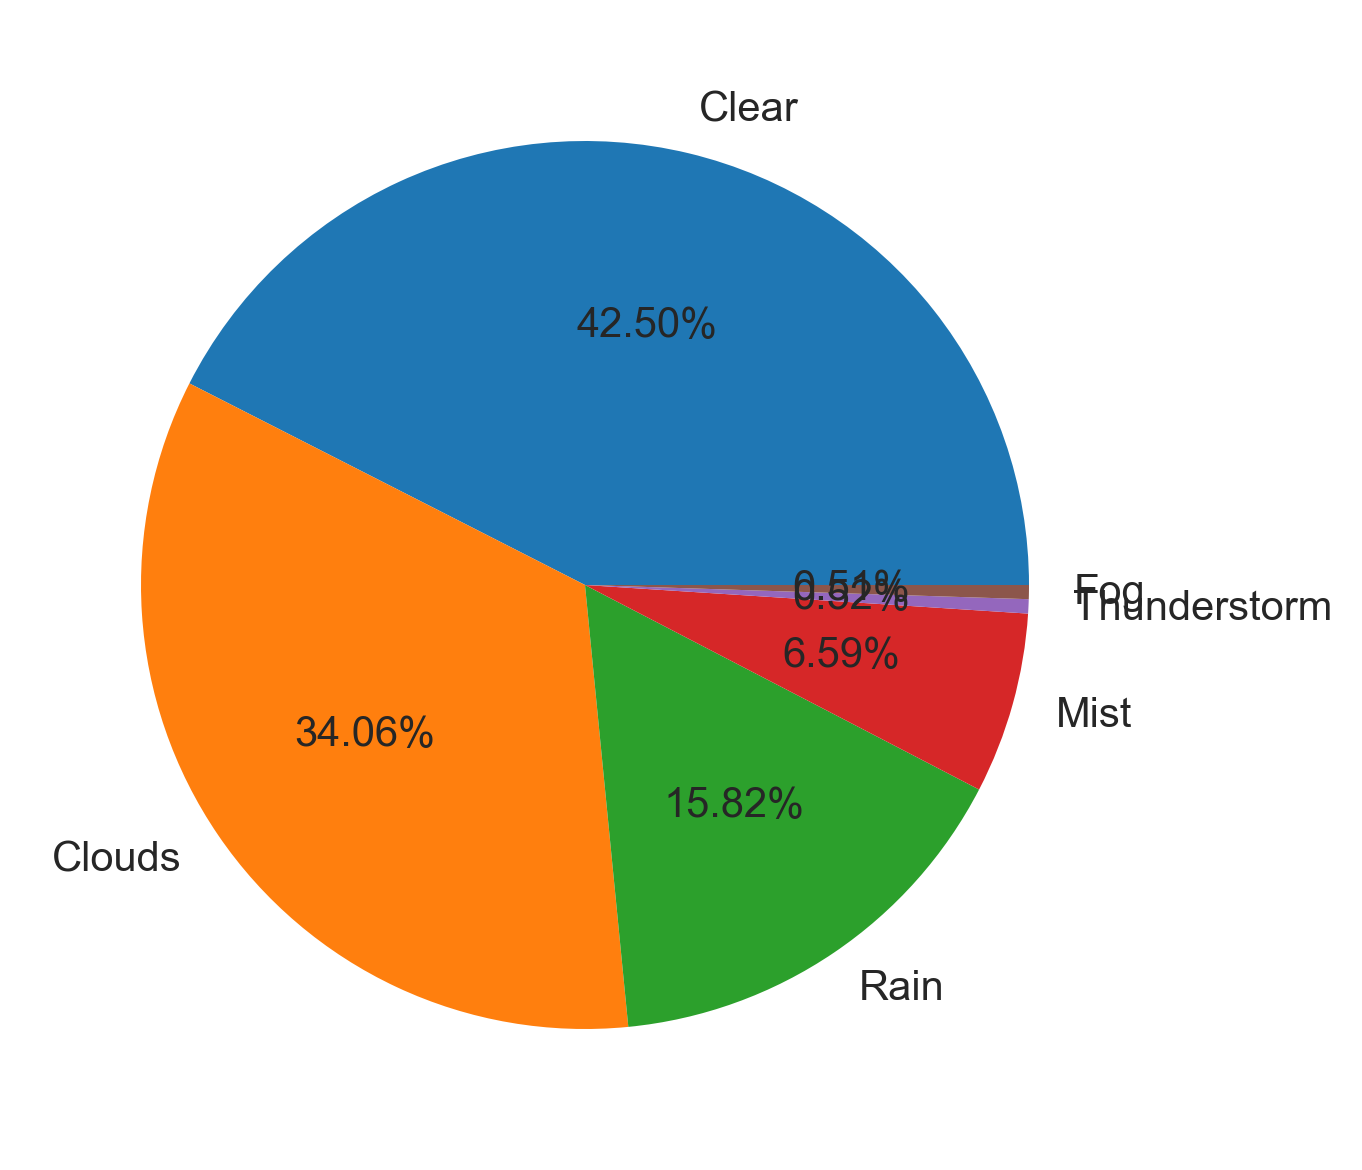

In [86]:
plot_bar_and_pie(Cat_San_Antonio, 'Weather', 'Frequency', 'San Antonio')

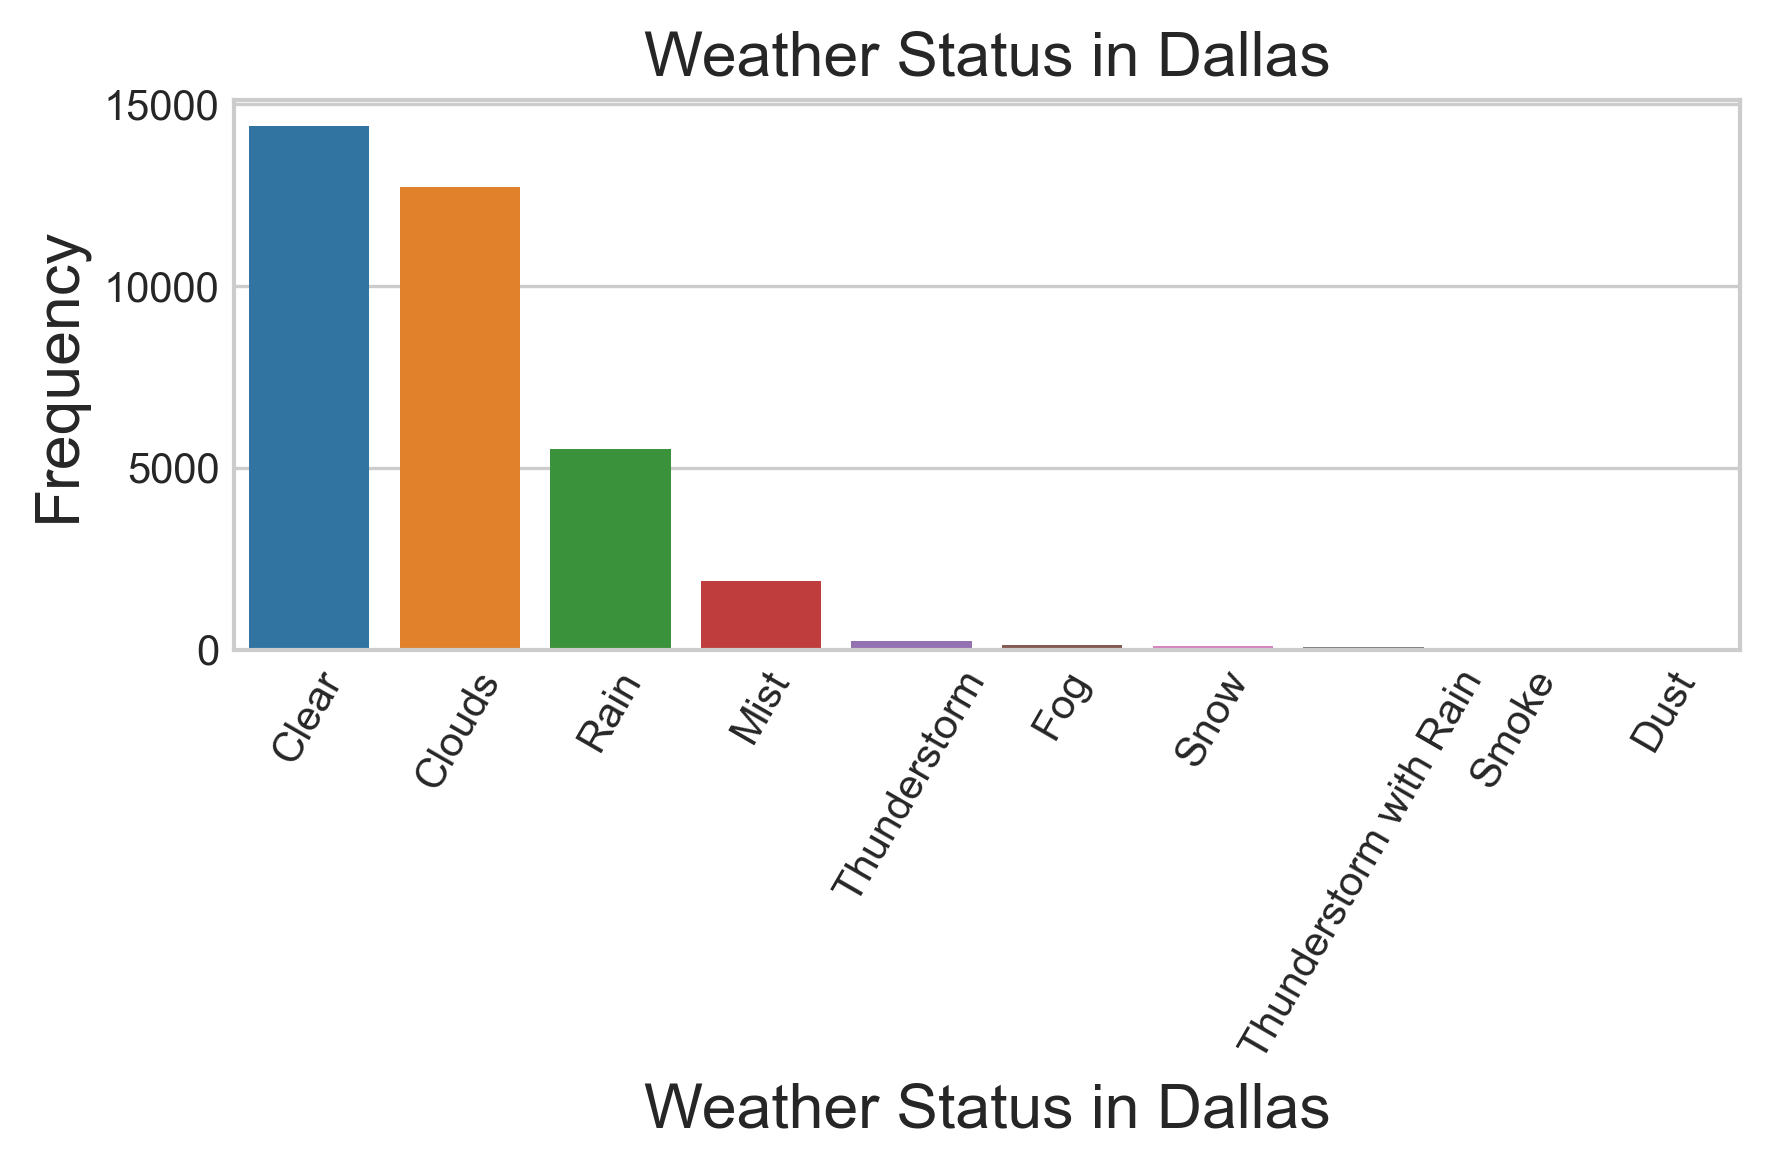

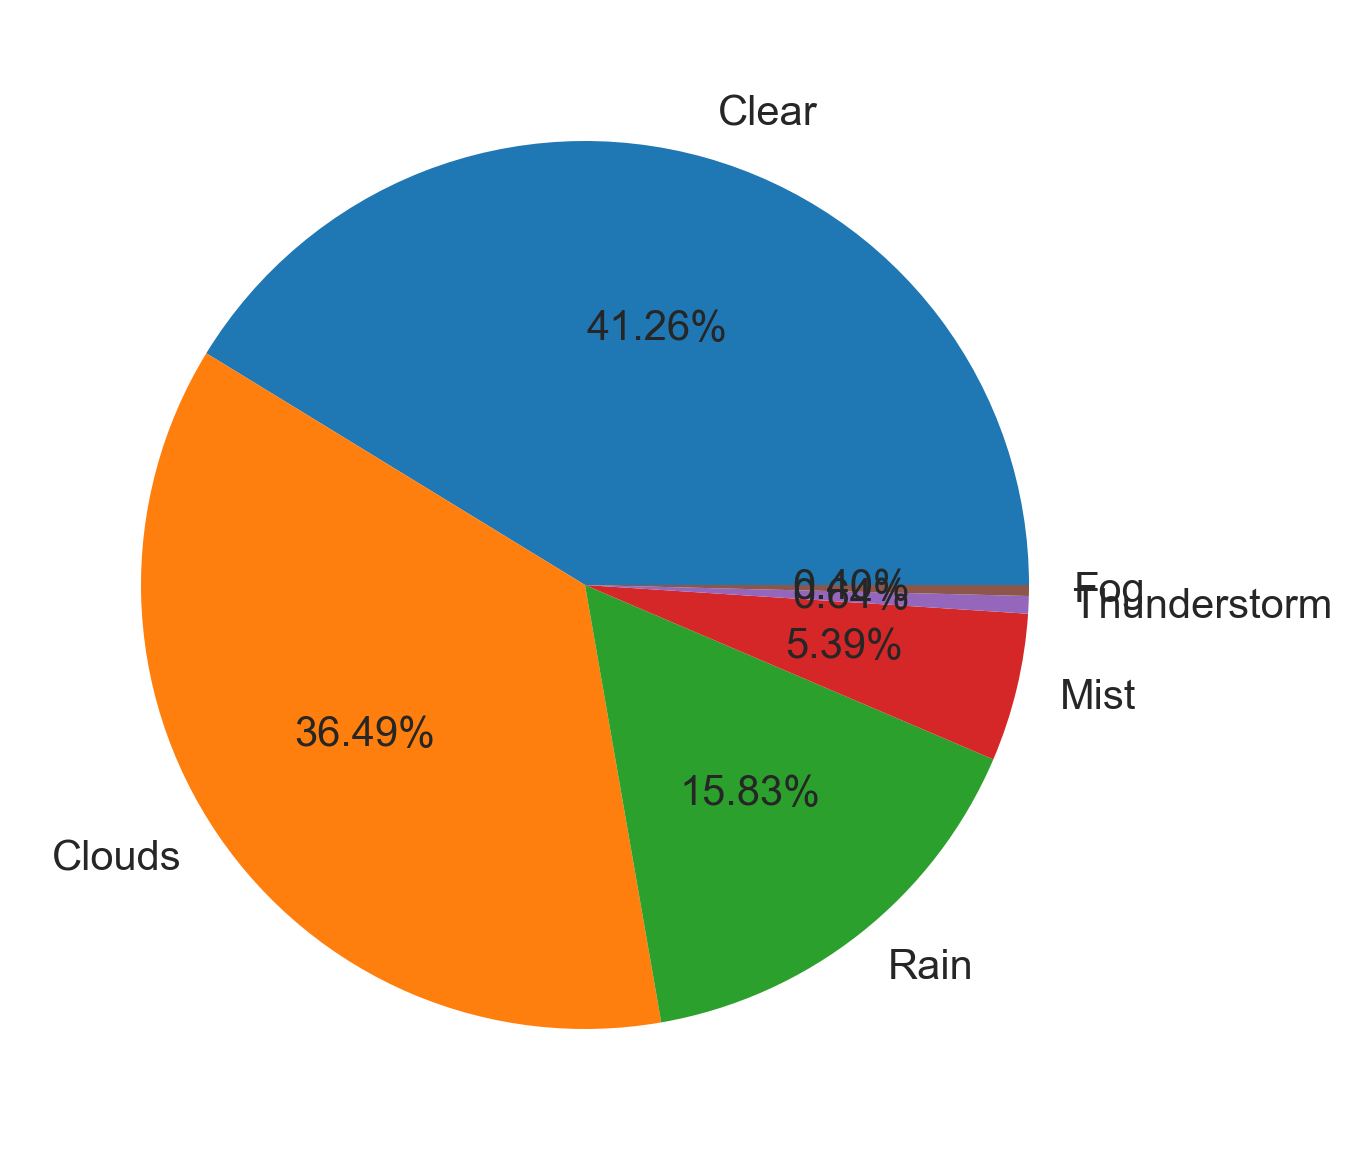

In [87]:
plot_bar_and_pie(Cat_Dallas, 'Weather', 'Frequency', 'Dallas')

The weather is mostly clear in San Antonio and Dallas, and mostly cloudy in Houston.

### Research Question 3 (Which city is best for wind energy investments?)

Calculating the total amount of energy that would be produced if wind turbines were installed in each of the three locations is necessary to provide an answer to this research question.

**The anticipated output power from wind turbines is determined using the following formula:**

$P_o = 0.5*C_pρAV^3 $
<br>where,<br>
$P_o$ = The output electrical power in (W)

$C_p$ = Total wind turbine efficiency

$ρ$ = Density of air (kg/$m^3$)

$A$ = The area swept by turbine blades  ($m^2$)

$V$ = Wind speed (m/s)

In our calculations, for simplicity, we would assume that $0.5*C_pρA = 1$

<br>The ranking, i.e., which city is best, won't be impacted by this assumption.



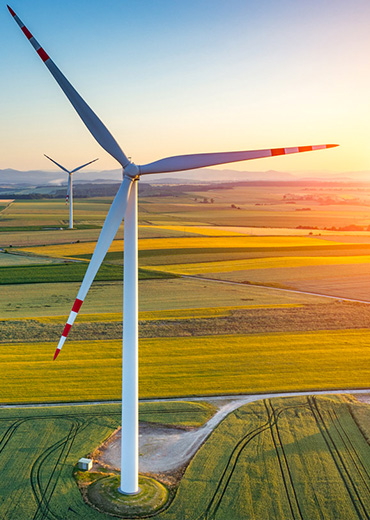

In [88]:
def create_wind_dataframe():
    # Create the dataframe
    df_Wind = pd.DataFrame()
    df_Wind['San_Antonio_WS'] = df_San_Antonio['Wind Speed']
    df_Wind['Houston_WS'] = df_Houston['Wind Speed']
    df_Wind['Dallas_WS'] = df_Dallas['Wind Speed']
    # Calculate the wind power for each city
    df_Wind['San Antonio'] = df_Wind['San_Antonio_WS']**3
    df_Wind['Houston'] = df_Wind['Houston_WS']**3
    df_Wind['Dallas'] = df_Wind['Dallas_WS']**3
    return df_Wind
df_Wind = create_wind_dataframe()

In [89]:
df_Total_Energy = (df_Wind/1000000).sum()[3:6].sort_values(0).loc[::-1].reset_index()
df_Total_Energy = df_Total_Energy.set_axis(['City', 'Total Energy'], axis='columns')
df_Total_Energy

,City,Total Energy
0,Dallas,3.897330
1,San Antonio,2.104237
2,Houston,2.098787


In [90]:
# Save Total Energy data frame for later use

df_Total_Energy.to_csv('Total_Wind_Energy.csv', index=False)

In [91]:
def plot_bar_chart(df,x_axis_label,y_axis_label, gen):
    sns.barplot(x=x_axis_label, y=y_axis_label,data=df)
    plt.xticks(rotation = 45)
    plt.title("Total Energy "+ gen,fontsize=15)
    plt.xlabel(x_axis_label,fontsize=15)
    plt.ylabel("Total Energy (MWh)",fontsize= 15)
    plt.tight_layout()
    plt.show()

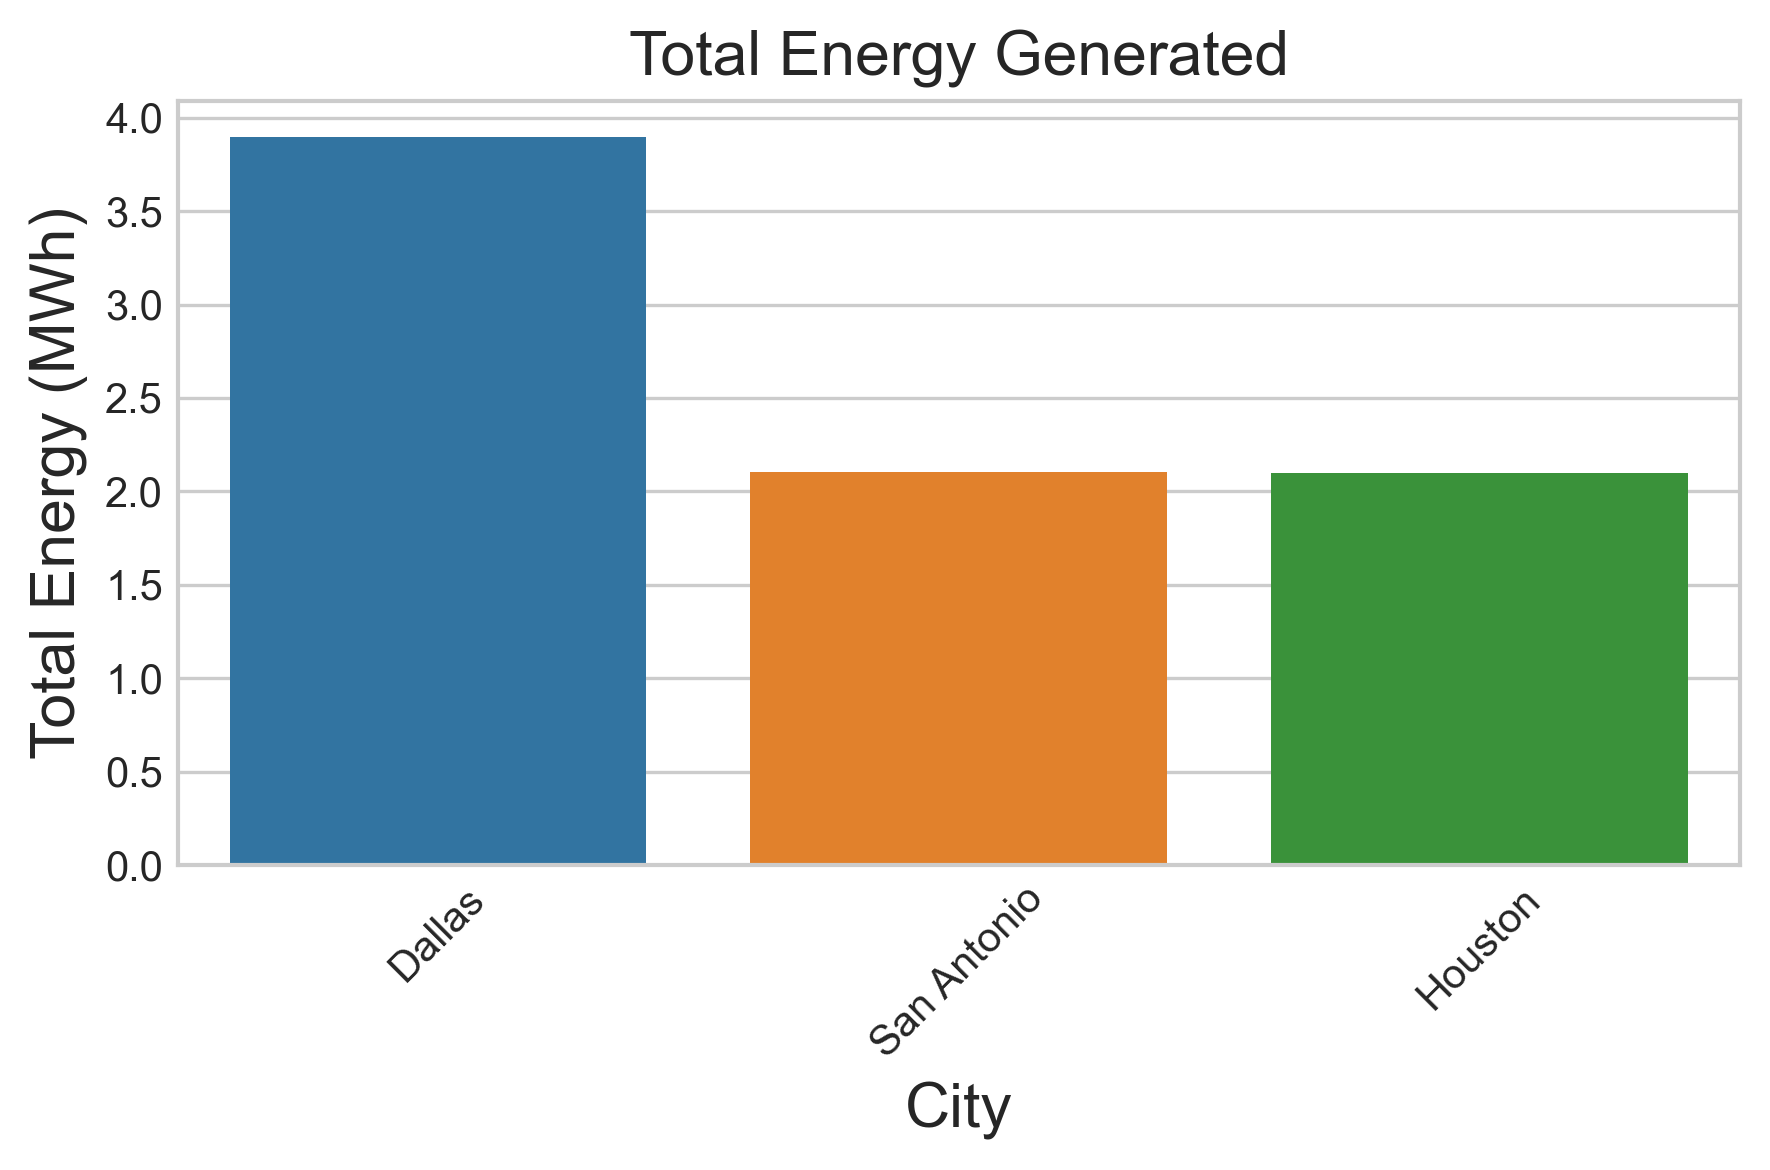

In [92]:
plot_bar_chart(df_Total_Energy, 'City', 'Total Energy', 'Generated')

The plot makes it clear that "Dallas" is the best of the three cities for wind power investments.

### Research Question 3 (Where in Texas does energy use seem to be highest?)

In [93]:
df_Total = Load_Data.drop(['datetime','ERCOT'],axis =1).sum().sort_values().loc[::-1].reset_index()
df_Total = df_Total.set_axis(['Region', 'Total Energy'], axis='columns')
df_Total

,Region,Total Energy
0,NORTH_C,4.540089e+08
1,COAST,3.935268e+08
2,SOUTH_C,2.245191e+08
3,SOUTHERN,1.131105e+08
4,FAR_WEST,6.836537e+07
5,EAST,4.893195e+07
6,WEST,3.898953e+07
7,NORTH,2.929703e+07


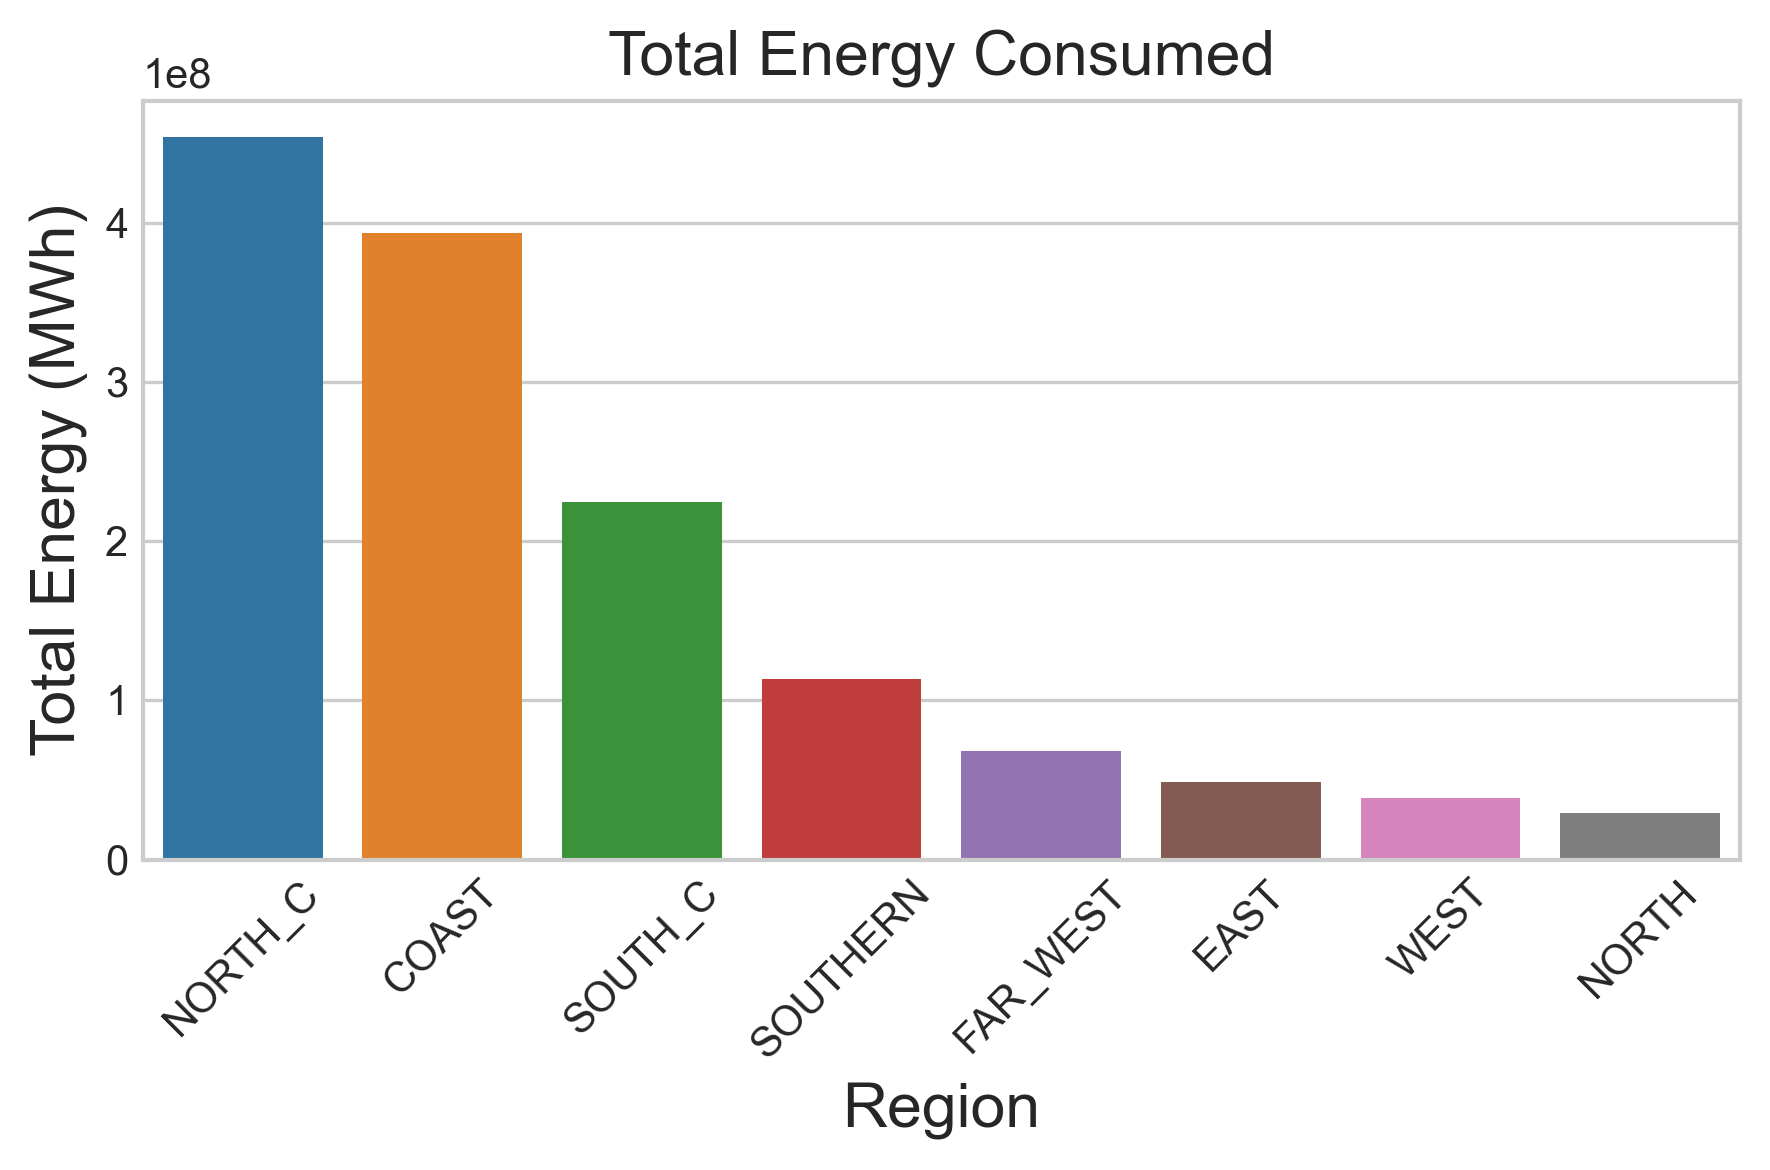

In [94]:
plot_bar_chart(df_Total, 'Region', 'Total Energy', 'Consumed')

The bar chart shows that the north of the central region of Texas consumes more electrical energy than other regions.

### Research Question 4 (What are the most influential weather factors for predicting electric load?)

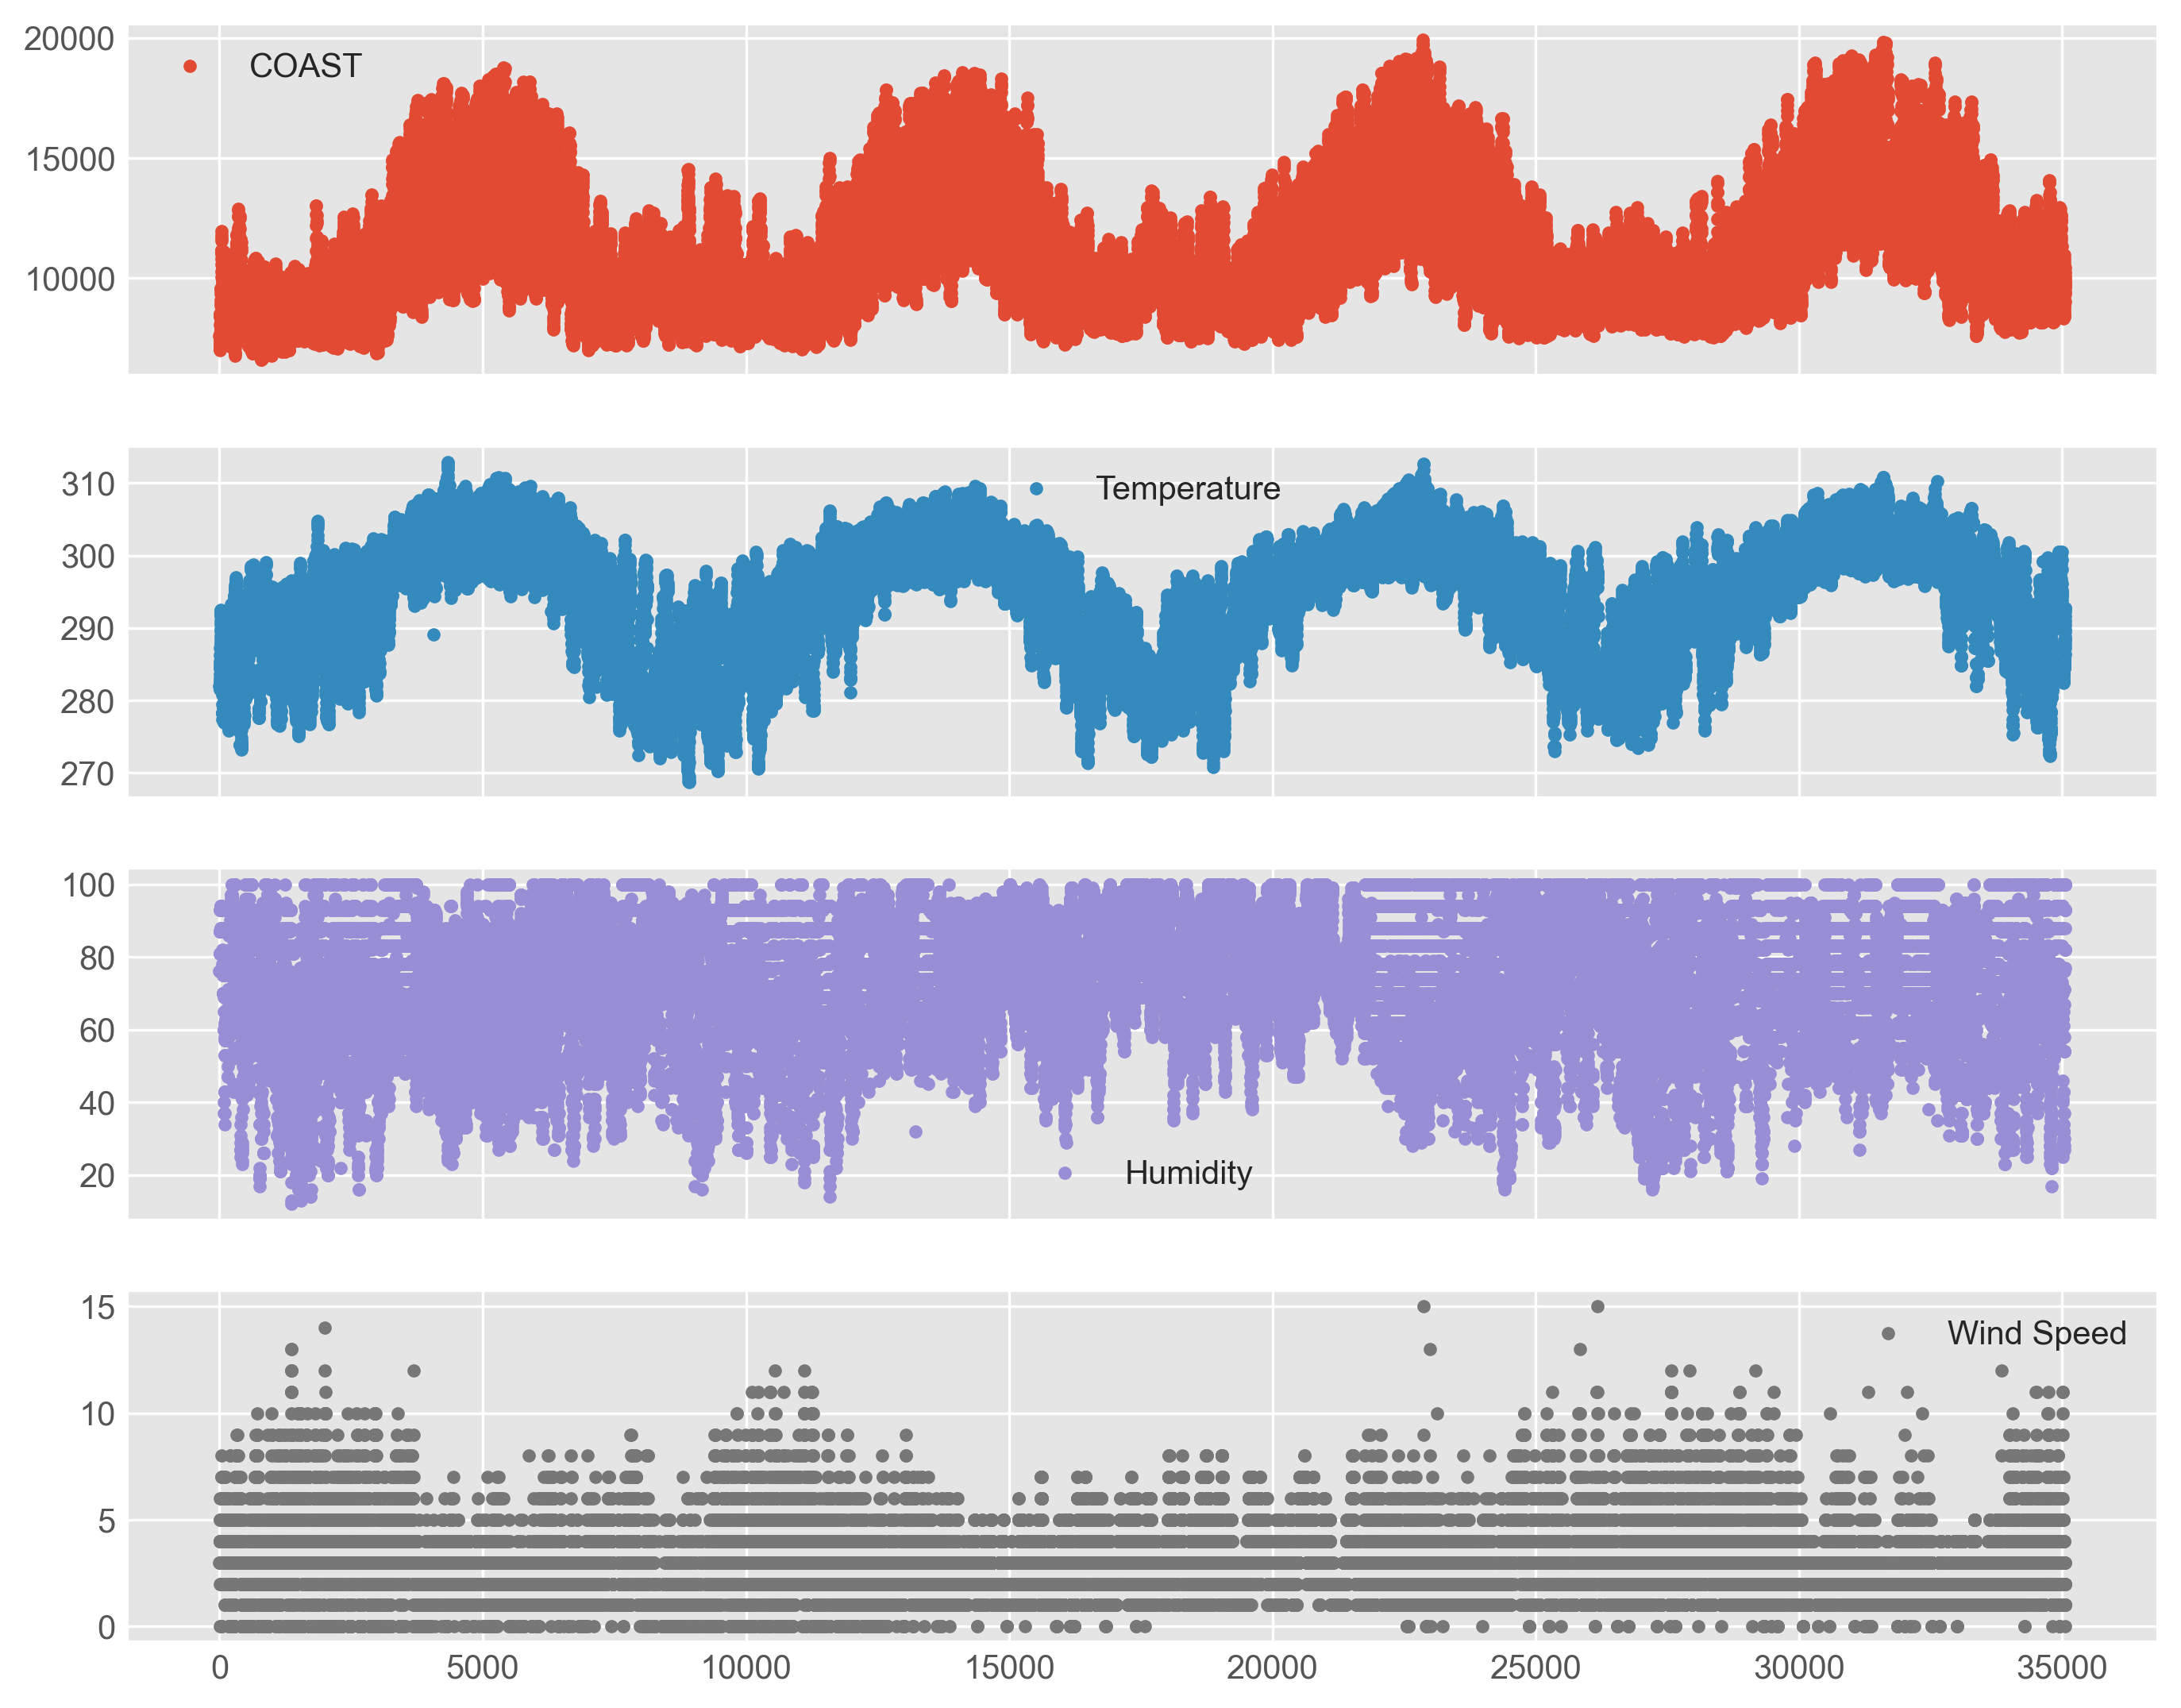

In [95]:
plt.style.use("ggplot")
cols_plot = ["COAST", "Temperature","Humidity","Wind Speed"]
axes=df_Houston[cols_plot].plot(marker=".", linestyle= "None", subplots= True, figsize=(11,9))

In [96]:
df_Houston_Corr = abs(df_Houston.corr()['COAST']).sort_values().loc[::-1][9:14].reset_index()
df_Houston_Corr = df_Houston_Corr.set_axis(['Meteorological Variable', 'Correlation Coefficient'], axis='columns')
df_Houston_Corr

,Meteorological Variable,Correlation Coefficient
0,Temperature,0.576123
1,Heat Index,0.304579
2,Pressure,0.140008
3,Humidity,0.123062
4,Wind Speed,0.064692


In [97]:
# Save the data frame to be used later

df_Houston_Corr.to_csv('Houston_Corr.csv', index=False)

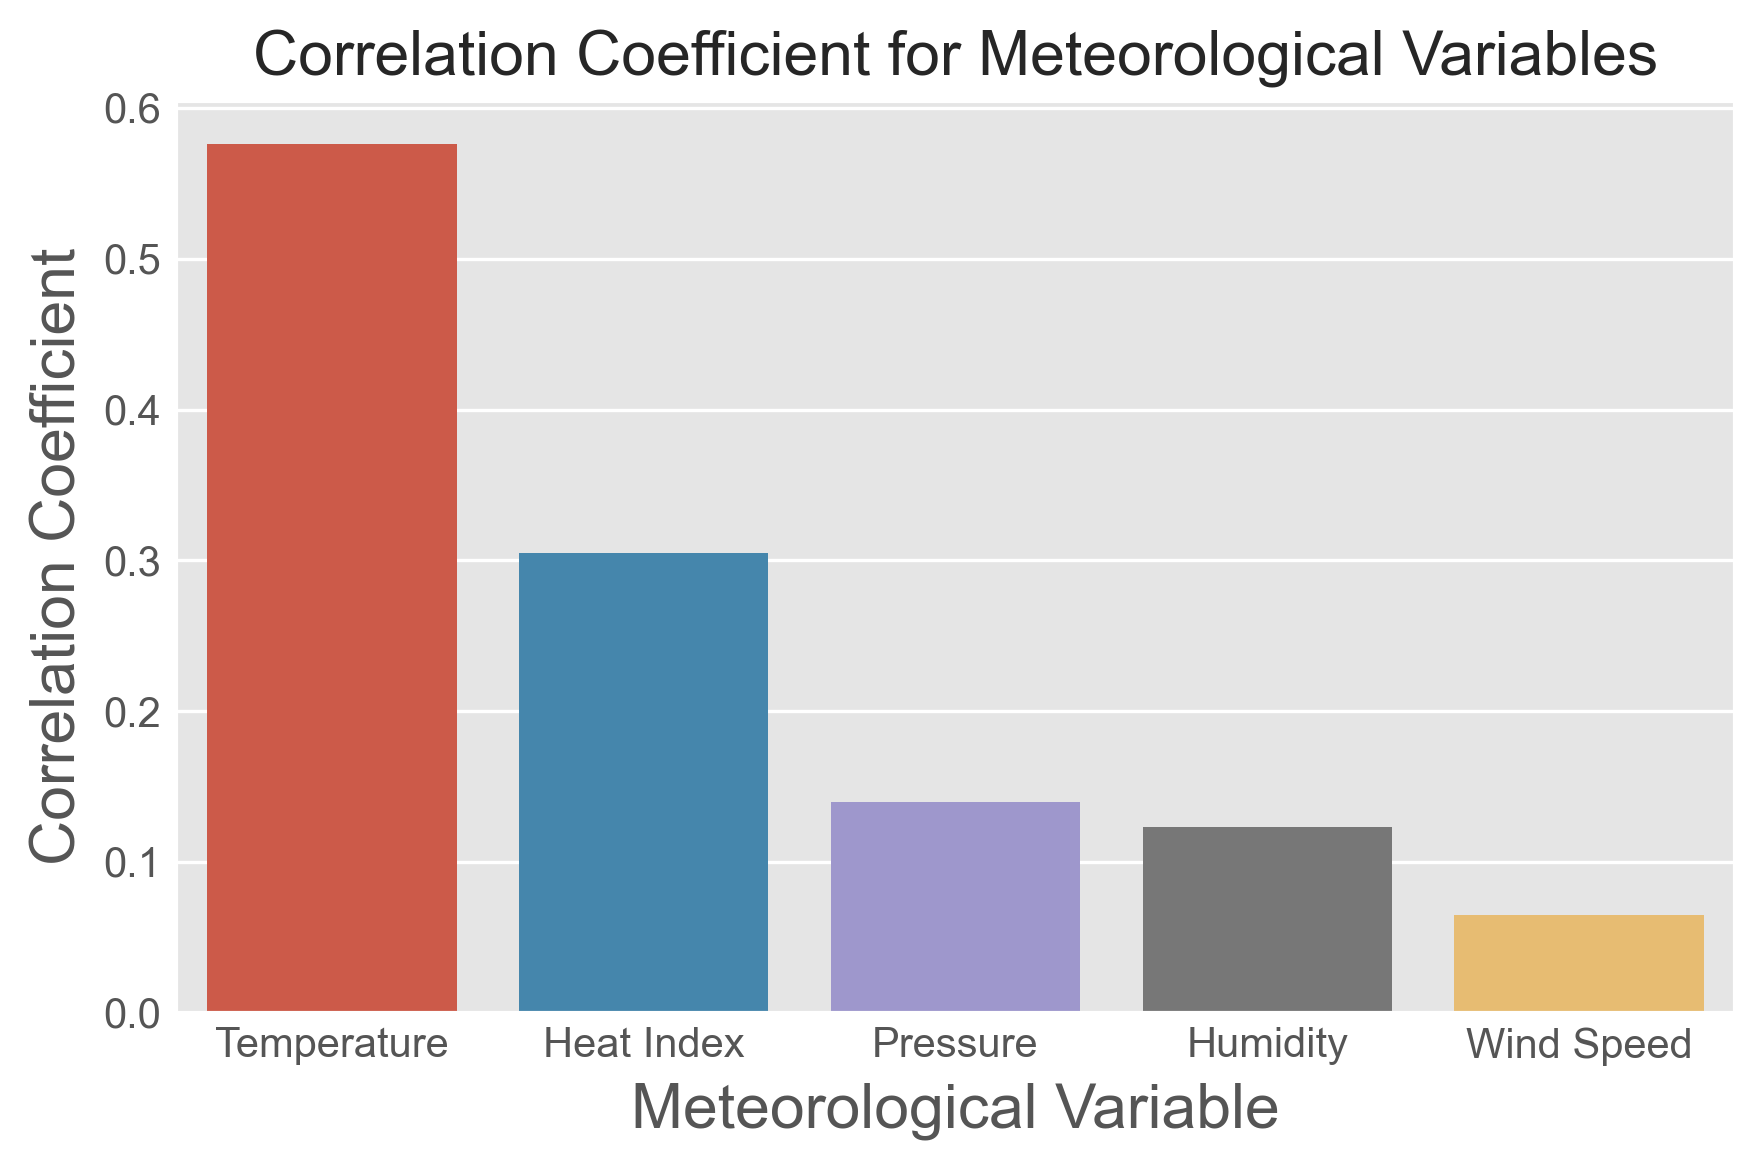

In [98]:
sns.barplot(x='Meteorological Variable', y='Correlation Coefficient',data=df_Houston_Corr)
plt.xticks()
plt.title("Correlation Coefficient for Meteorological Variables",fontsize=15)
plt.xlabel("Meteorological Variable",fontsize=15)
plt.ylabel("Correlation Coefficient",fontsize= 15)
plt.tight_layout()
plt.show()

The plot shows that "Temperature" is the most influential meteorological factor in predicting electric load. Therefore, temperature data is important when developing load forecasting models.

### Research Question 5 (Which season has the highest load and temperature?)

In [99]:
# Save the data frame to be used later

df_Houston.to_csv('Houston.csv', index=False)

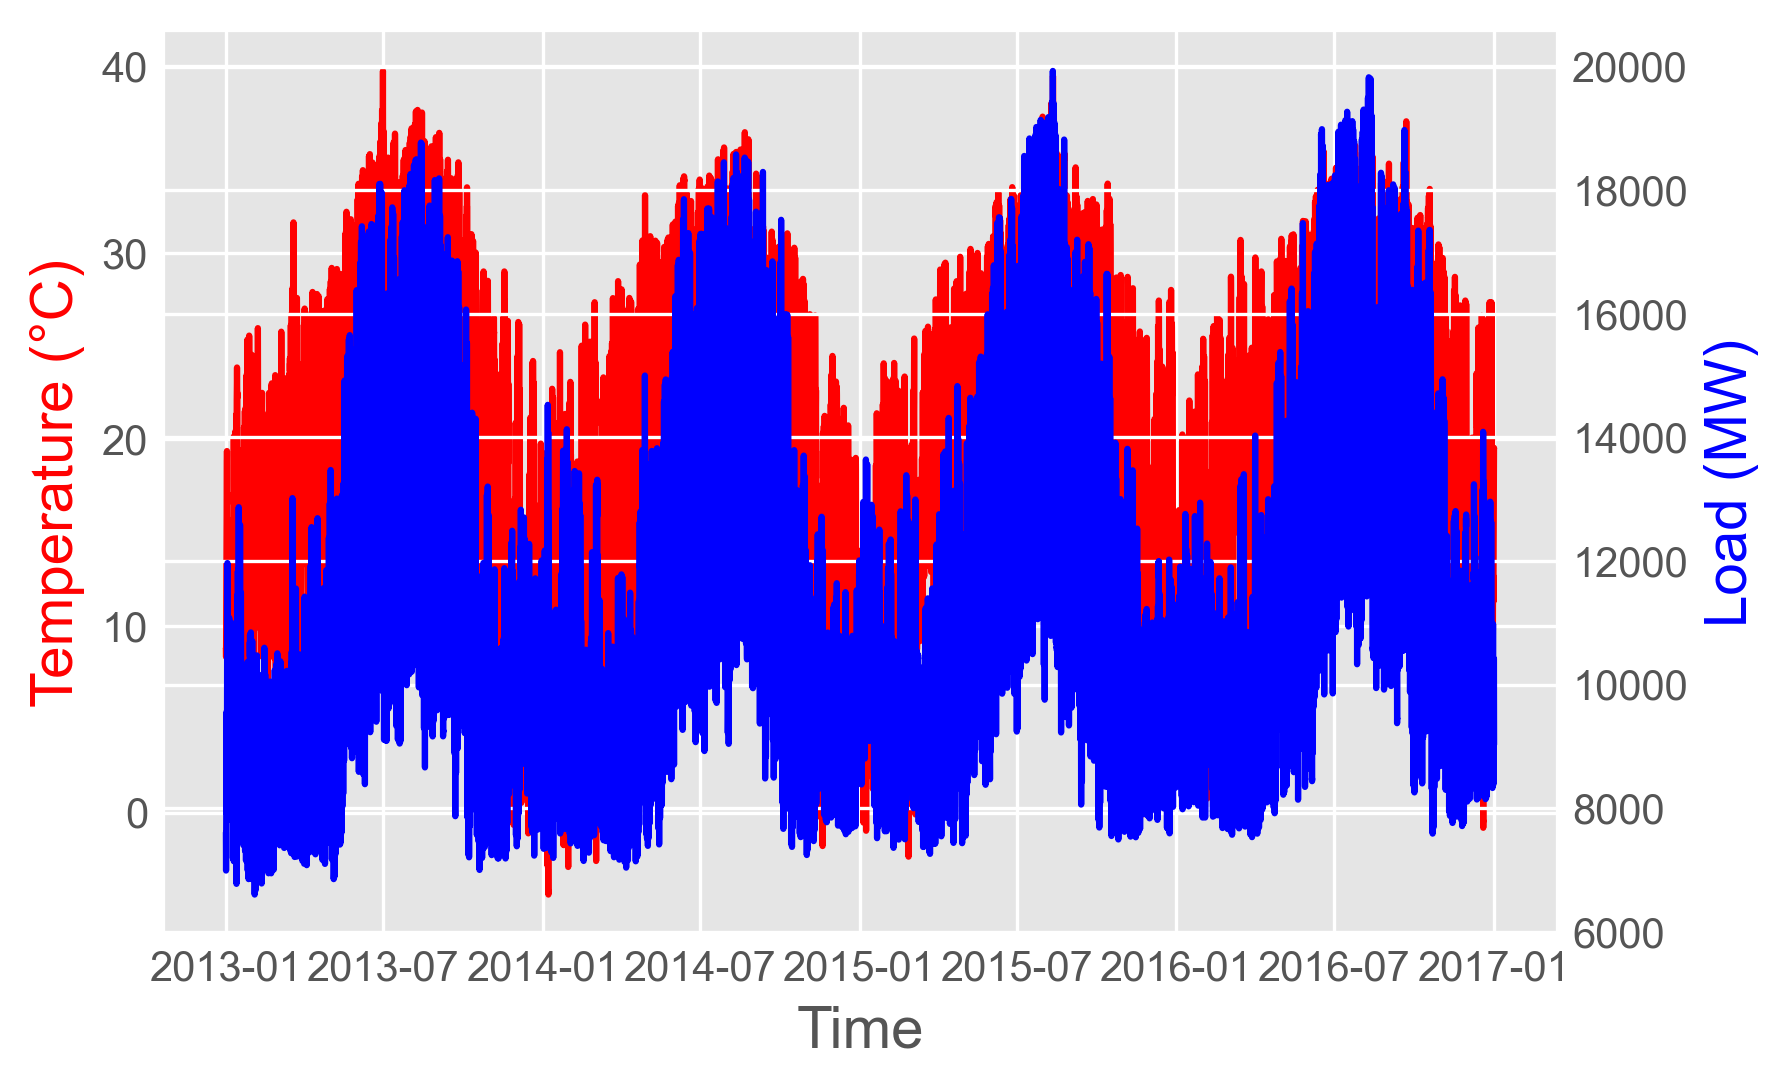

In [100]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_Houston.datetime,
        df_Houston.Temperature-273.15,
        color="red", 
        #marker="o"
       )

# Set x-axis and y-axis labels
ax.set_xlabel("Time", fontsize = 14)
ax.set_ylabel("Temperature (°C)", color="red",fontsize=14)

# Create a second object, i.e., twin object, for the other y-axis on the plot
ax2=ax.twinx()
# Make the plot with the second y-axis using the second axis object
ax2.plot(df_Houston.datetime, df_Houston.COAST,color="blue")

ax2.set_ylabel("Load (MW)",color="blue",fontsize=14)
plt.show()

There are a lot of short-term fluctuations in the figure. These details, e.g., hourly or daily fluctuations, are not of interest to us here. Therefore, a smoothing technique should be used to filter out these high-frequency fluctuations. In this project, the moving average is used.

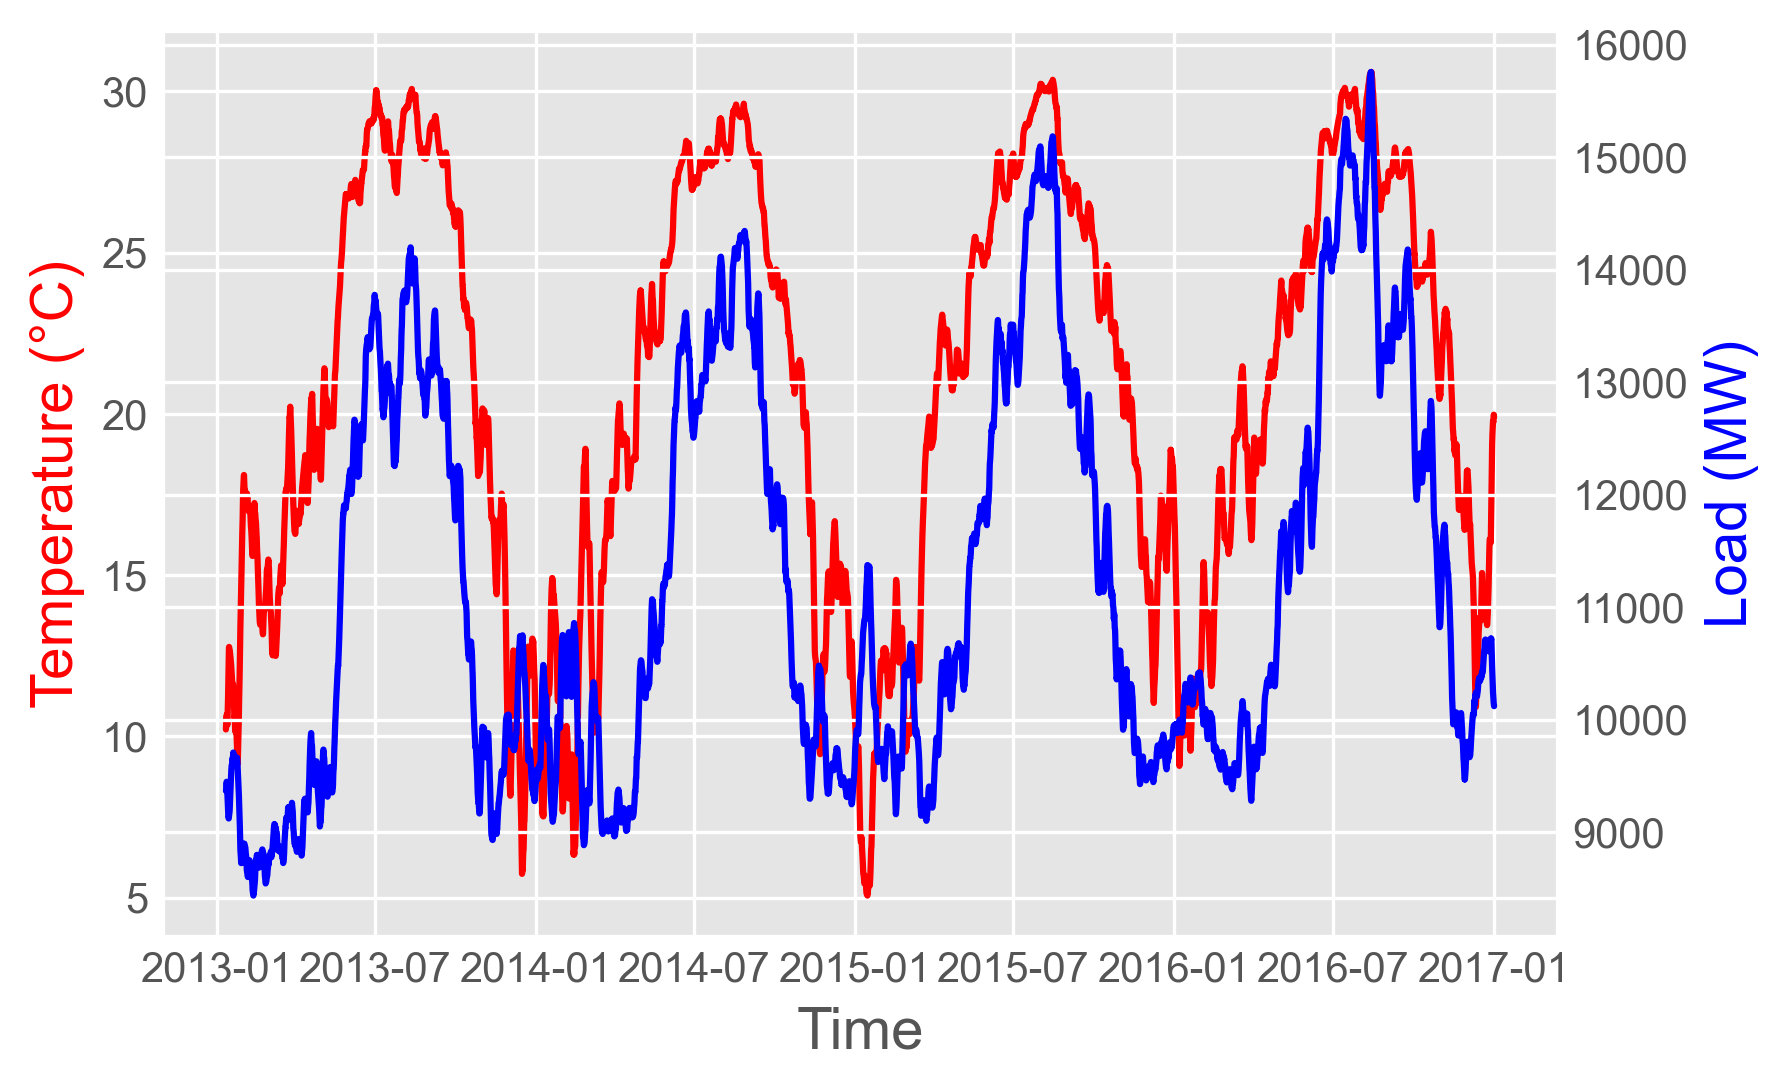

In [101]:
# Create figure and axis objects 
fig,ax = plt.subplots()
Window_Size = 240

# Make the plot
ax.plot(df_Houston.datetime,
       (df_Houston.Temperature-273.15).rolling(Window_Size).mean().tolist(),
        color="red", 
        #marker="o"
       )
# Set x-axis and y-axis labels
ax.set_xlabel("Time", fontsize = 14)
ax.set_ylabel("Temperature (°C)",color="red",fontsize=14)

# Create a second object, i.e., twin object, for the other y-axis on the plot

ax2=ax.twinx()

# Make the plot with the second y-axis using the second axis object
ax2.plot(df_Houston.datetime, df_Houston.COAST.rolling(Window_Size).mean().tolist(),color="blue")
ax2.set_ylabel("Load (MW)",color="blue",fontsize=14)
plt.show()

The figure shows that the peak load in each year occurs in July and August, i.e., in the summer season. Also, we can see that peak load and peak temperature both occur at the same time. This proves the correlation between temperature and electric load. This coincidence arises because the air conditioning load increases in the summer as the temperature rises. Another insight from the figure is that when the temperature is near its minimum, the load begins to increase somewhat. This is due to the heating load being used when the weather is getting colder. As a result, the minimum load occurs when the weather is pleasant, i.e., when it is not too hot to switch on the air conditioning load or too cold to switch on the heating load.

<a id='conclusions'></a>
## Conclusions

In this project, weather and electric load data for different regions in Texas in the United States were analyzed. Three cities from Texas state were considered which are Houston, San Antonio, and Dallas. Results show that the hottest city out of them is Dallas. Furthermore, the best city for wind power investments in Texas is Dallas as well. Moreover, the weather is mostly clear in San Antonio and Dallas, and mostly cloudy in Houston. In addition to that, the north of the central region of Texas consumes more electrical energy than other regions. Also, "Temperature" is the most influential meteorological factor in predicting electric load. Therefore, temperature data is important when developing load forecasting models. Moreover, the load reaches its peak in the summer because of the air conditioning load being turned on, and the minimum load occurs when the weather is pleasant, i.e., when it is not too hot to switch on the air conditioning load or too cold to switch on the heating load.

<a id='references'></a>
## References
- Weather Data:<br>
https://www.kaggle.com/datasets/selfishgene/historical-hourly-weather-data?select=pressure.csv
- ERCOT Load Data:<br>
https://www.ercot.com/gridinfo/load/load_hist